In [1]:

import sys, os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patheffects as pe

sys.path.append(r"/Users/gerwinkoolstra/Documents/Code")
sys.path.append(r"/Volumes/EeroQ/lib")

from quantum_electron.electron_counter import FullModel, make_potential, find_minimum_location
from quantum_electron.schrodinger_solver import QuantumAnalysis

module_path = r"/Volumes/EeroQ/Projects/004_Device2.0/fem/calc_niyaz"

if module_path not in sys.path:
    print(module_path)
    sys.path.append(module_path)

from pathfinder import init_zhk
zhk_dir=init_zhk()

from zeroheliumkit.old.version0p1.geometries import GeometryCollection
from zeroheliumkit.old.version0p1.settings import *
from zeroheliumkit.eeroq import QubitAnalyzer
from quantum_electron.utils import xy2r, r2xy
import scipy

%matplotlib inline
%config InlineBackend.figure_format='retina'

/Users/gerwinkoolstra/opt/anaconda3/envs/eonhe/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/Volumes/EeroQ/Projects/004_Device2.0/fem/calc_niyaz
/Users/gerwinkoolstra/lib


In [2]:
save_dir = r"/Volumes/EeroQ/Projects/004_Device2.0/fem/calc_gerwin/trap_2.3.1/work_files/"
device = GeometryCollection(import_file=save_dir + "trap_fem.pickle")
trap = QubitAnalyzer((save_dir+"trap_potentialall.txt", 'all', '2Dmap'),
                     (save_dir+"trap_potentialdot.txt", 'dot', '2Dmap'),
                    #  (save_dir+"trap_potentialxyZ.txt", 'xyZ', '2Dslices'),
                    #  (save_dir+"trap_perpfieldxy.txt", 'Ez', '2Dmap'),
                     )

print(trap.dot.keys())

/Volumes/EeroQ/Projects/004_Device2.0/fem/calc_gerwin/trap_2.3.1/work_files/trap_fem.pickle: ['bottom', 'dielectric', 'etch', 'top', 'wafer']
dict_keys(['barrier', 'gnd', 'resD', 'resU', 'trench', 'unload', 'xlist', 'ylist'])


Perturbing solution 5 times at 0.10 K. (dx,dy) ~ (0.013, 0.019) um...
	New minimum was found after perturbing!
	New minimum was found after perturbing!
Perturbing solution 5 times at 0.10 K. (dx,dy) ~ (0.014, 0.019) um...
	New minimum was found after perturbing!
	New minimum was found after perturbing!
	New minimum was found after perturbing!
Perturbing solution 5 times at 0.10 K. (dx,dy) ~ (0.013, 0.018) um...
	New minimum was found after perturbing!
	New minimum was found after perturbing!
	New minimum was found after perturbing!
Perturbing solution 5 times at 0.10 K. (dx,dy) ~ (0.013, 0.018) um...
Perturbing solution 5 times at 0.10 K. (dx,dy) ~ (0.013, 0.018) um...


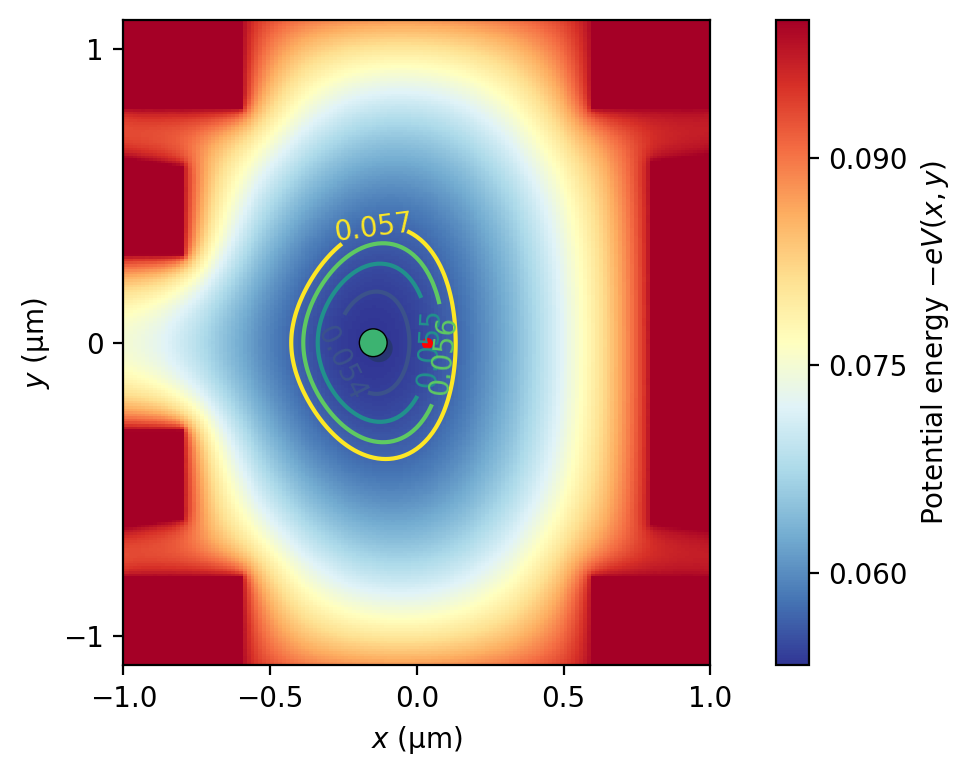

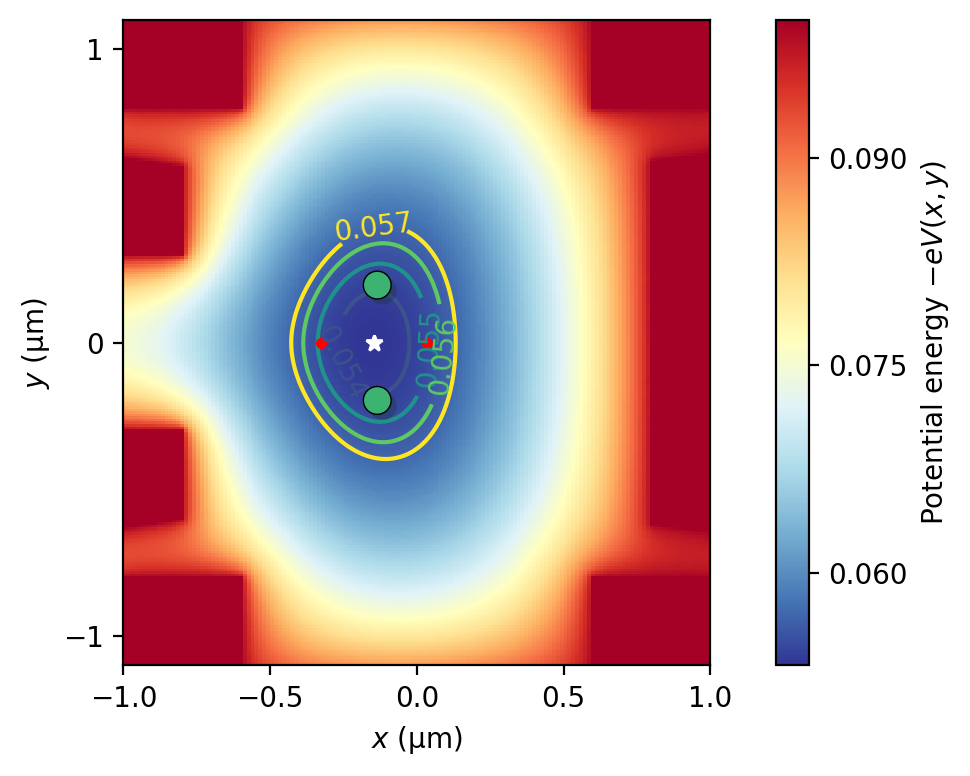

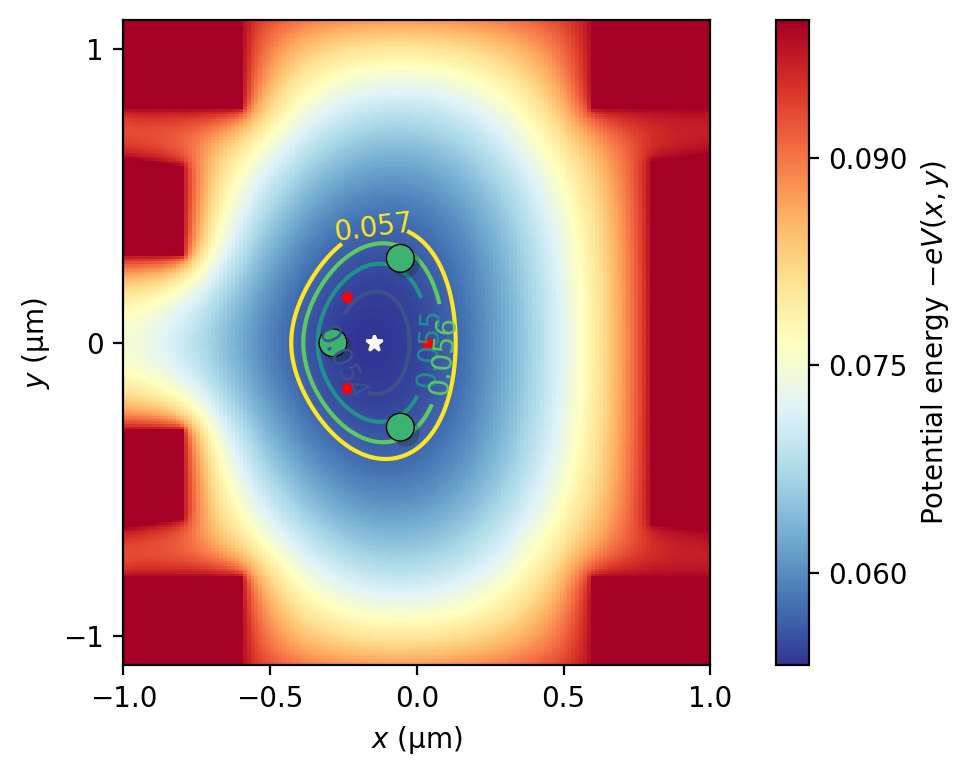

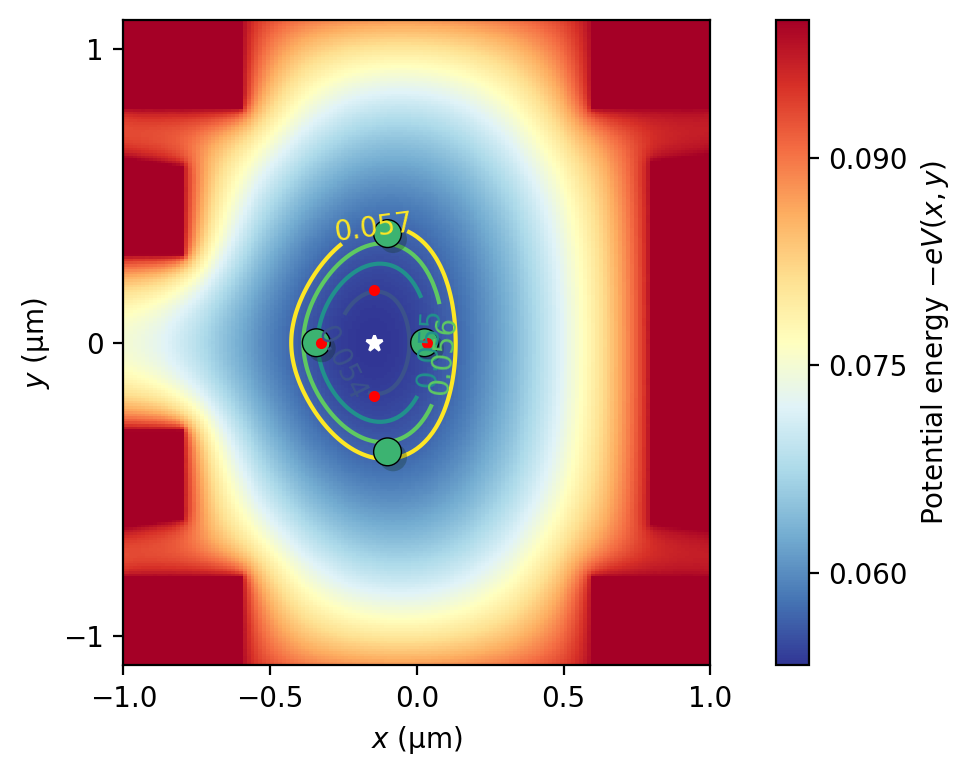

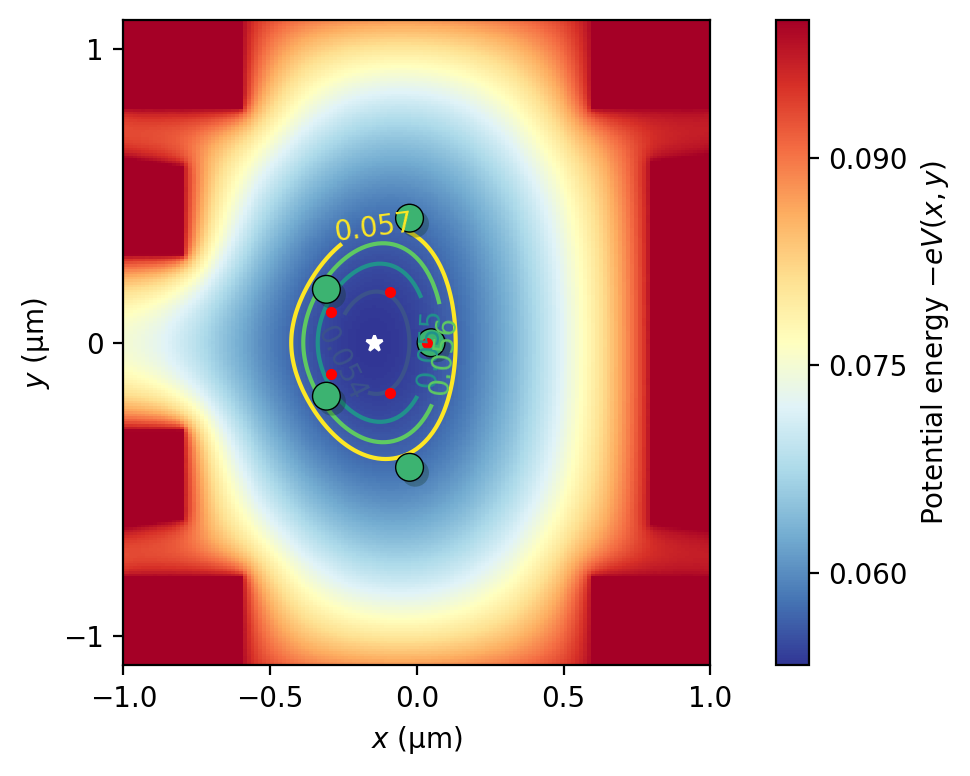

In [32]:
voltages = {'trench':   0.05,
            'gnd':      0, 
            'barrier':  -0.10,
            'resU':     -0.10,
            'resD':     -0.10,
            'unload':   -0.10}

Nmax = 6
energies = np.zeros(Nmax-1)
for N in range(1, Nmax):
    f = FullModel(trap.dot, voltages)
    f.remove_unbound_electrons = False
    
    initial_condition = f.generate_initial_condition(N)
    init_x, init_y = r2xy(initial_condition)
        
    res = f.get_trap_electron_positions(n_electrons=N, electron_initial_positions=None, verbose=False)
    
    final_x, final_y = r2xy(res['x'])
    
    qa = QuantumAnalysis(trap.dot, voltages)
    qa.plot_potential_energy(coor=[0, 0], dxdy=(2, 2.2))
    plt.plot(final_x*1e6, final_y*1e6, 'ok', mfc='mediumseagreen', mew=0.5, ms=10, path_effects=[pe.SimplePatchShadow(), pe.Normal()])
    plt.plot(init_x*1e6, init_y*1e6, 'or', ms=3)

    energies[N-1] = res['fun']

Text(0, 0.5, 'Cost function')

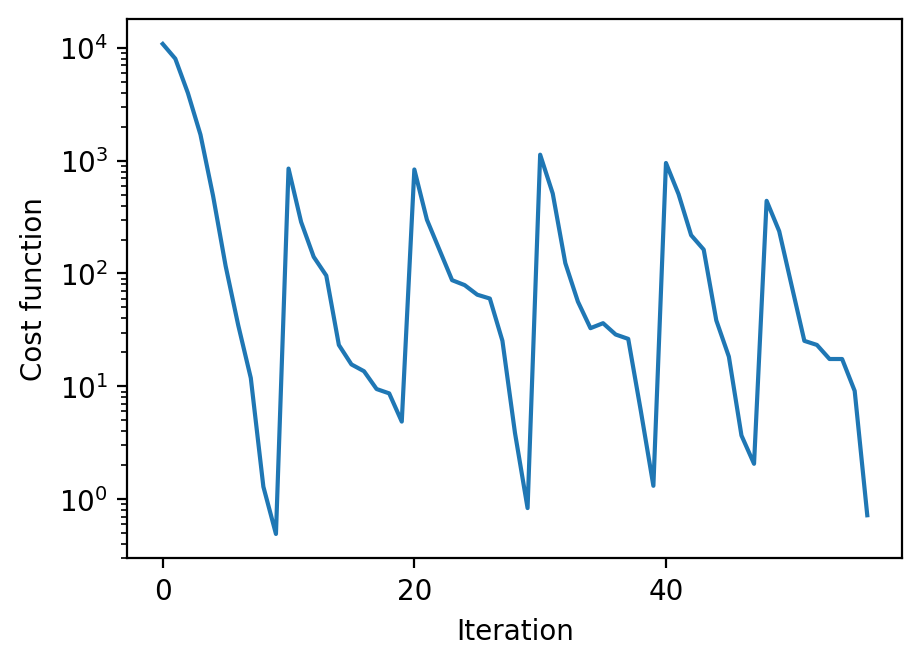

In [34]:
fig = plt.figure(figsize=(5.,3.5))
plt.plot(f.CM.curr_grad_norm)
plt.yscale('log')
plt.locator_params(axis='x', nbins=4)
plt.xlabel("Iteration")
plt.ylabel("Cost function")

# Sweep voltage

Perturbing solution 5 times at 0.10 K. (dx,dy) ~ (0.013, 0.018) um...
Perturbing solution 5 times at 0.10 K. (dx,dy) ~ (0.013, 0.019) um...
Perturbing solution 5 times at 0.10 K. (dx,dy) ~ (0.013, 0.019) um...
Perturbing solution 5 times at 0.10 K. (dx,dy) ~ (0.013, 0.019) um...
Perturbing solution 5 times at 0.10 K. (dx,dy) ~ (0.012, 0.019) um...
Perturbing solution 5 times at 0.10 K. (dx,dy) ~ (0.013, 0.019) um...
Perturbing solution 5 times at 0.10 K. (dx,dy) ~ (0.012, 0.019) um...
	New minimum was found after perturbing!
Perturbing solution 5 times at 0.10 K. (dx,dy) ~ (0.012, 0.019) um...
	New minimum was found after perturbing!
Perturbing solution 5 times at 0.10 K. (dx,dy) ~ (0.012, 0.019) um...
	New minimum was found after perturbing!
	New minimum was found after perturbing!
	New minimum was found after perturbing!
	New minimum was found after perturbing!
Perturbing solution 5 times at 0.10 K. (dx,dy) ~ (0.013, 0.019) um...
	New minimum was found after perturbing!
Perturbing so

/Users/gerwinkoolstra/Documents/Code/quantum_electron/schrodinger_solver.py:535: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


Perturbing solution 5 times at 0.10 K. (dx,dy) ~ (0.013, 0.017) um...
	New minimum was found after perturbing!
Perturbing solution 5 times at 0.10 K. (dx,dy) ~ (0.013, 0.018) um...
	New minimum was found after perturbing!
	New minimum was found after perturbing!
	There is a lower state, but minimizer didn't converge!
Perturbing solution 5 times at 0.10 K. (dx,dy) ~ (0.014, 0.018) um...
	New minimum was found after perturbing!
	New minimum was found after perturbing!
Perturbing solution 5 times at 0.10 K. (dx,dy) ~ (0.014, 0.014) um...
	New minimum was found after perturbing!
Perturbing solution 5 times at 0.10 K. (dx,dy) ~ (0.015, 0.014) um...
	New minimum was found after perturbing!
Following electrons are outside the simulation domain
(x,y) = (-33.153, 0.032) um
(x,y) = (-39.990, -0.000) um
Final L-inf norm of gradient = 9197.94 eV/m
Please check your initial condition, are all electrons confined in the simulation area?
Perturbing solution 5 times at 0.10 K. (dx,dy) ~ (0.018, 0.008) 

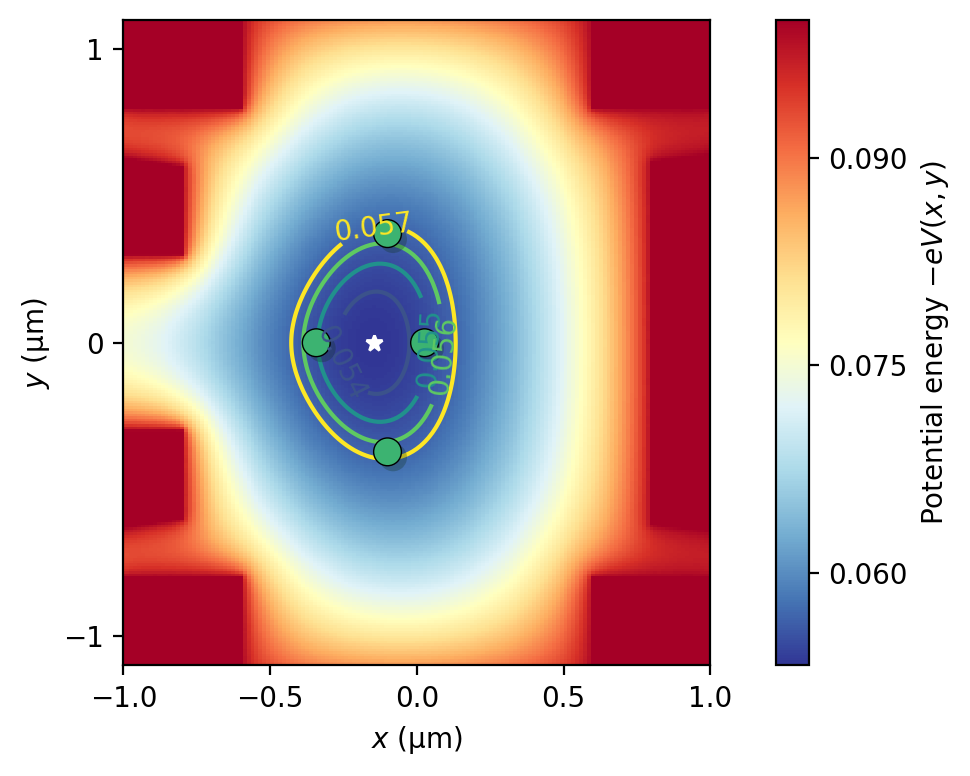

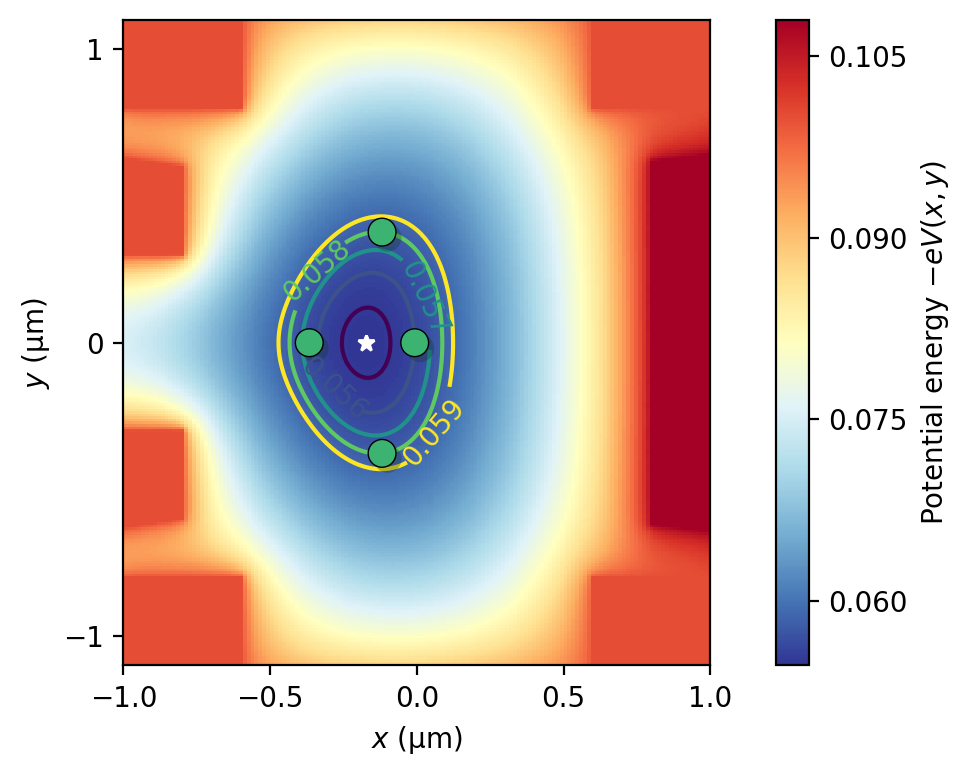

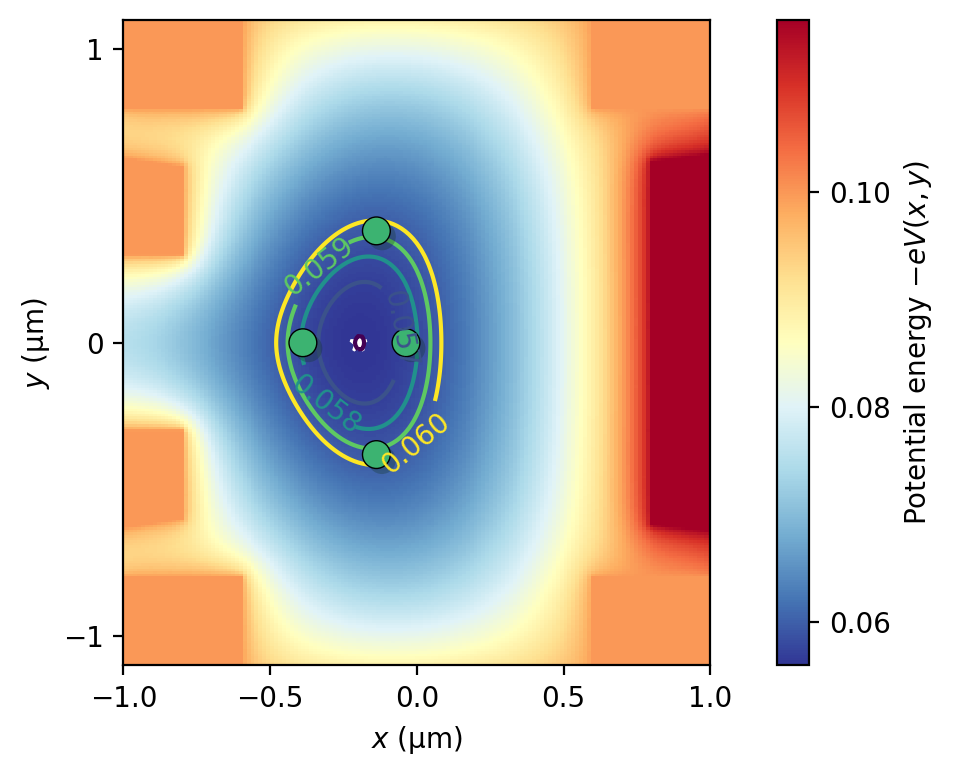

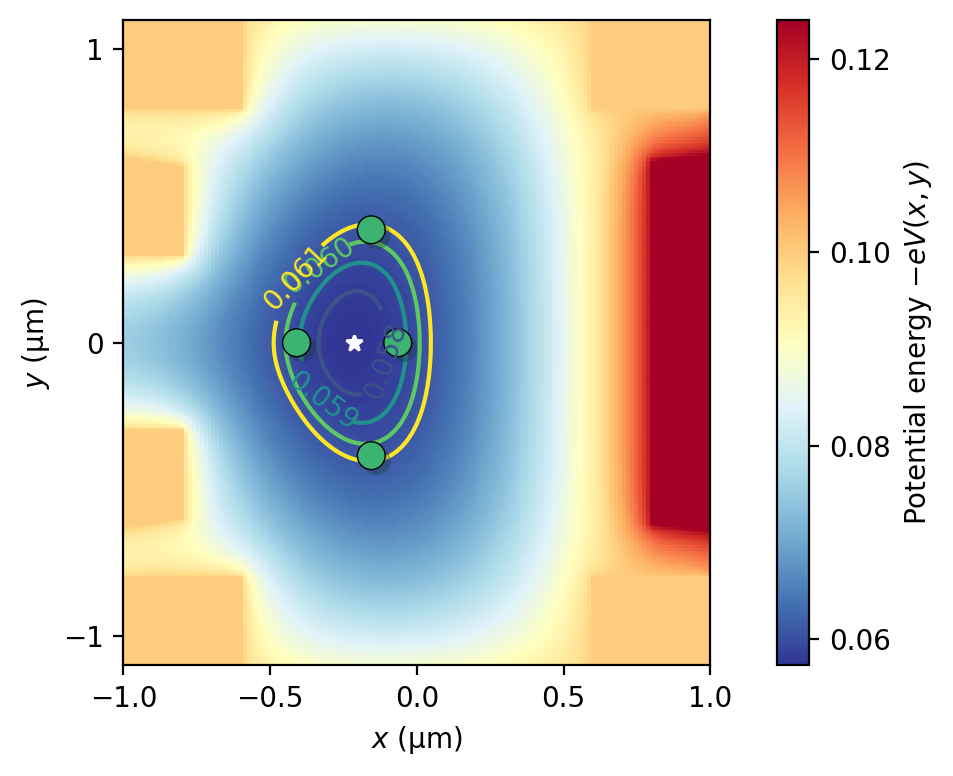

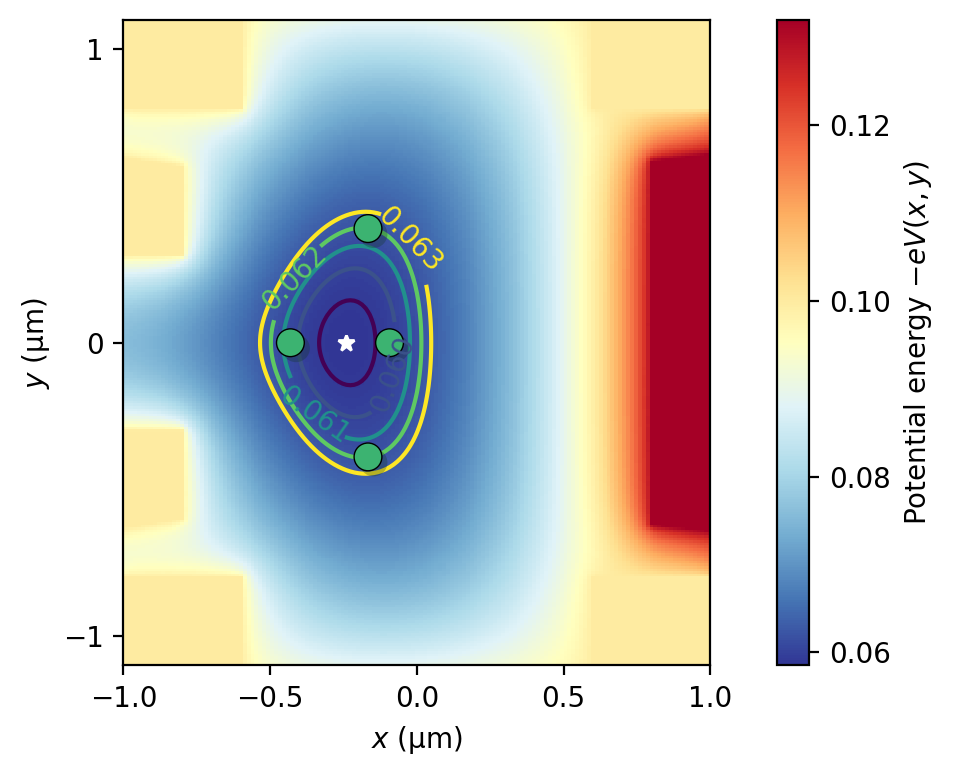

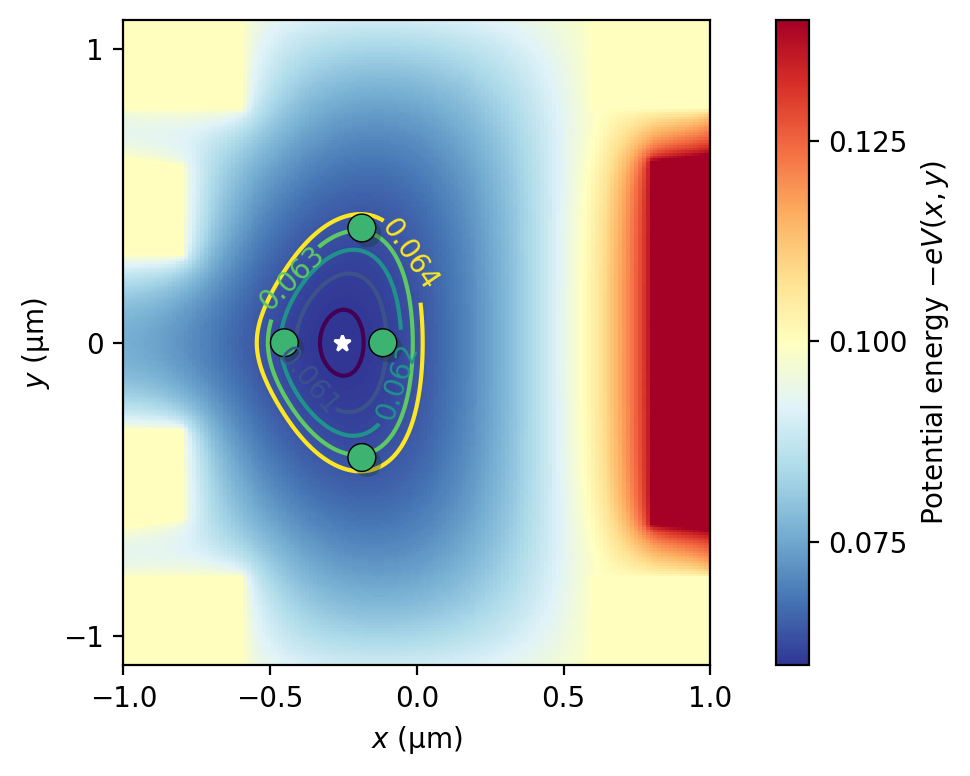

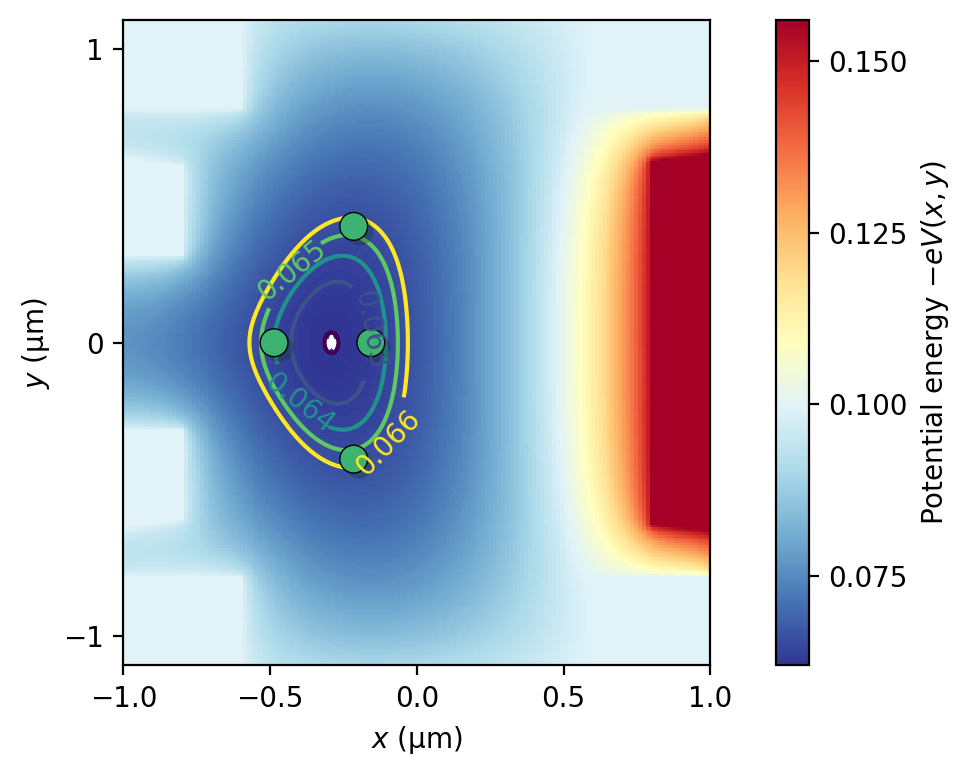

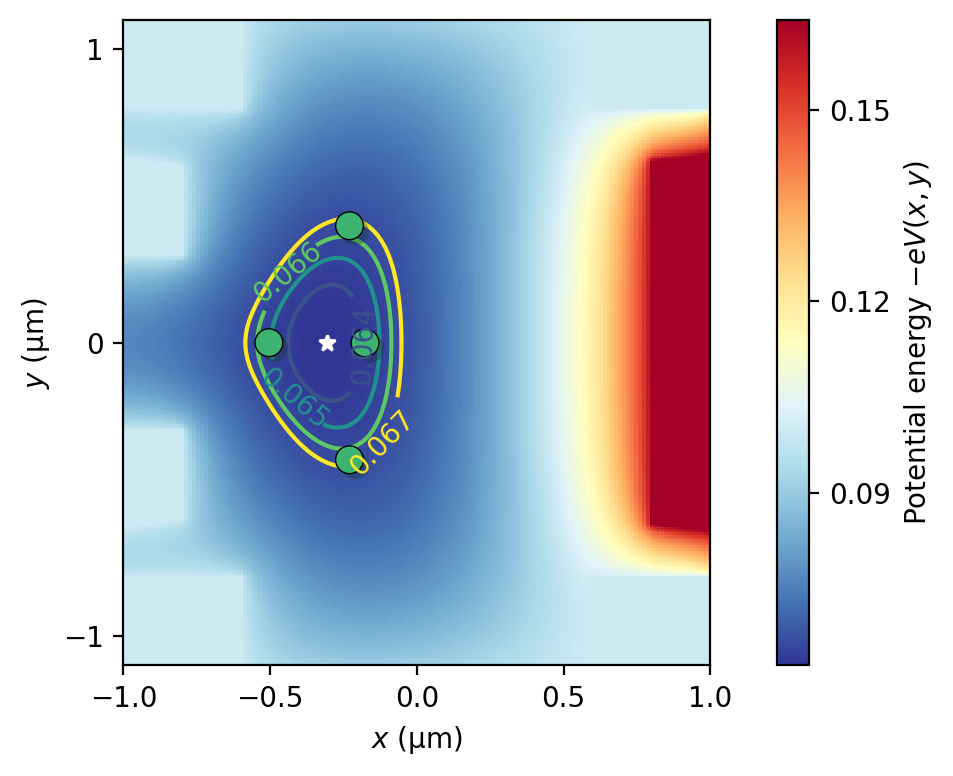

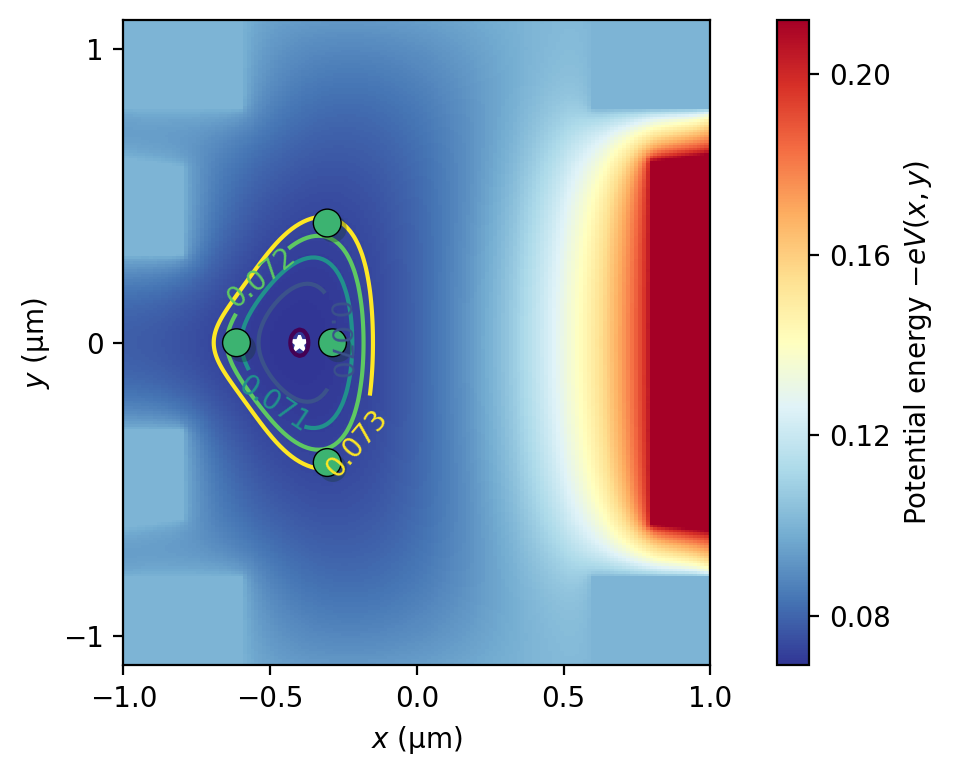

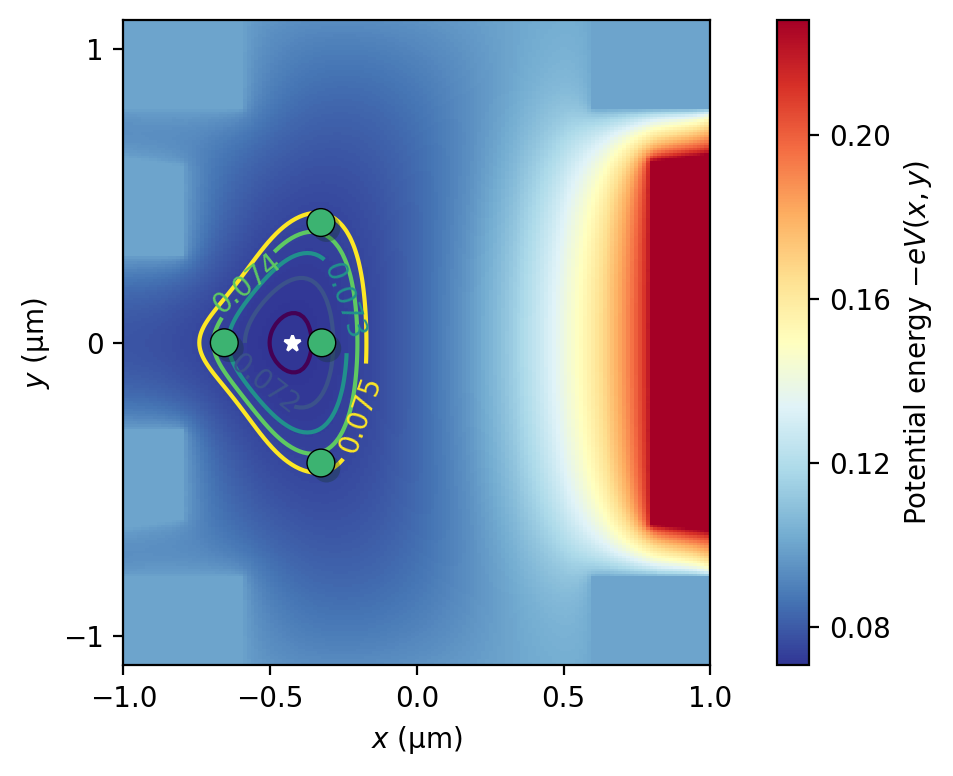

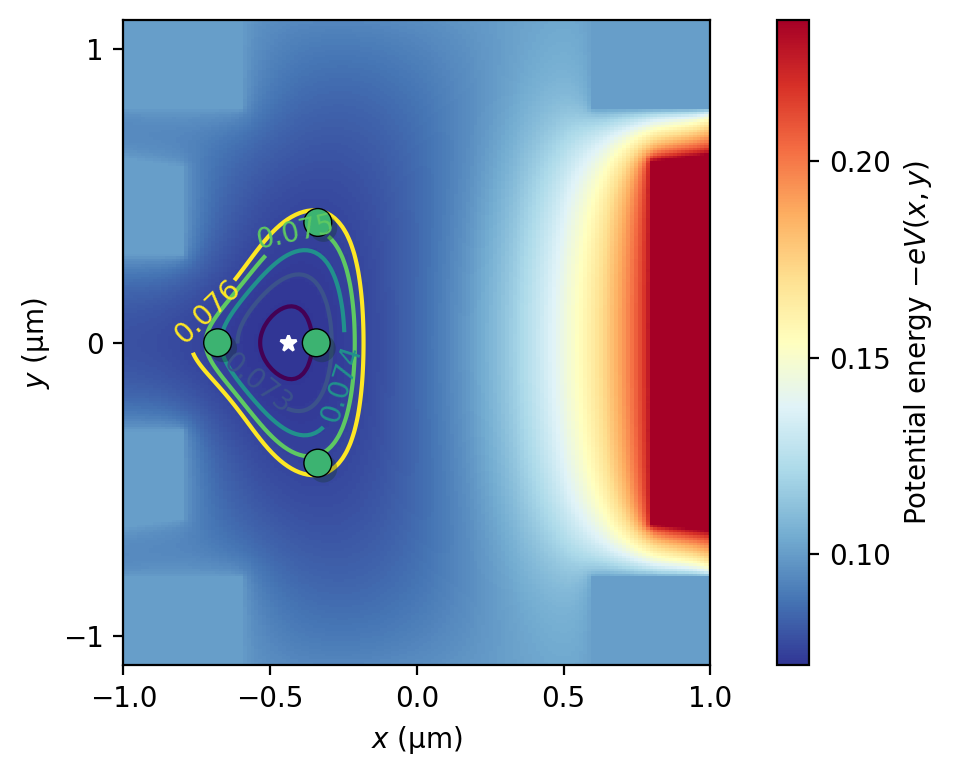

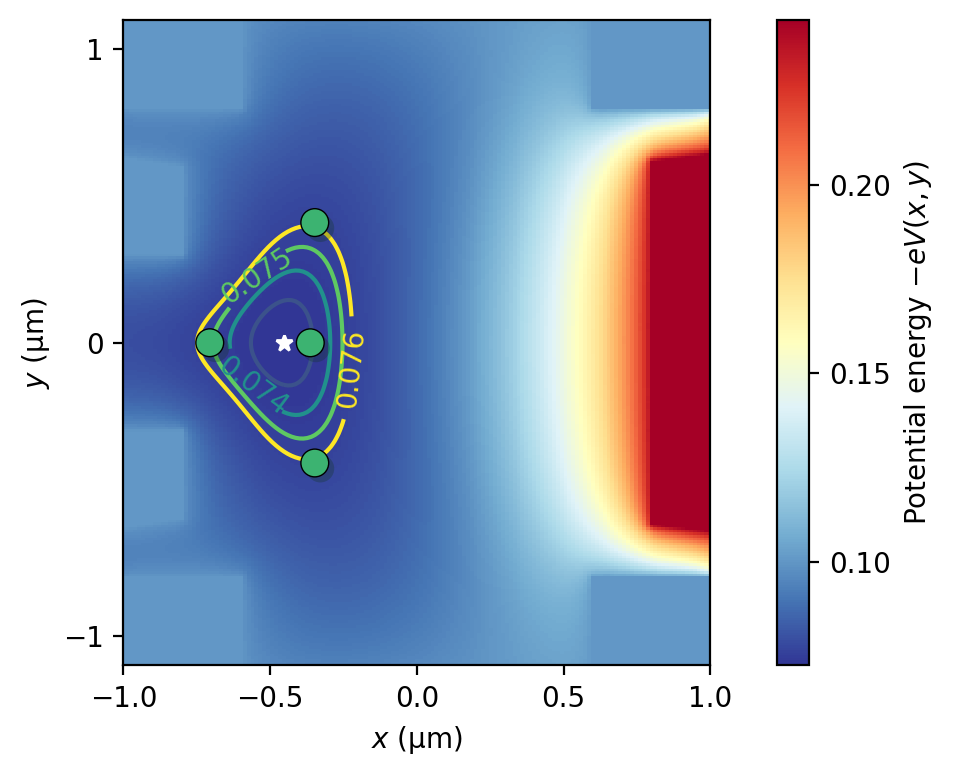

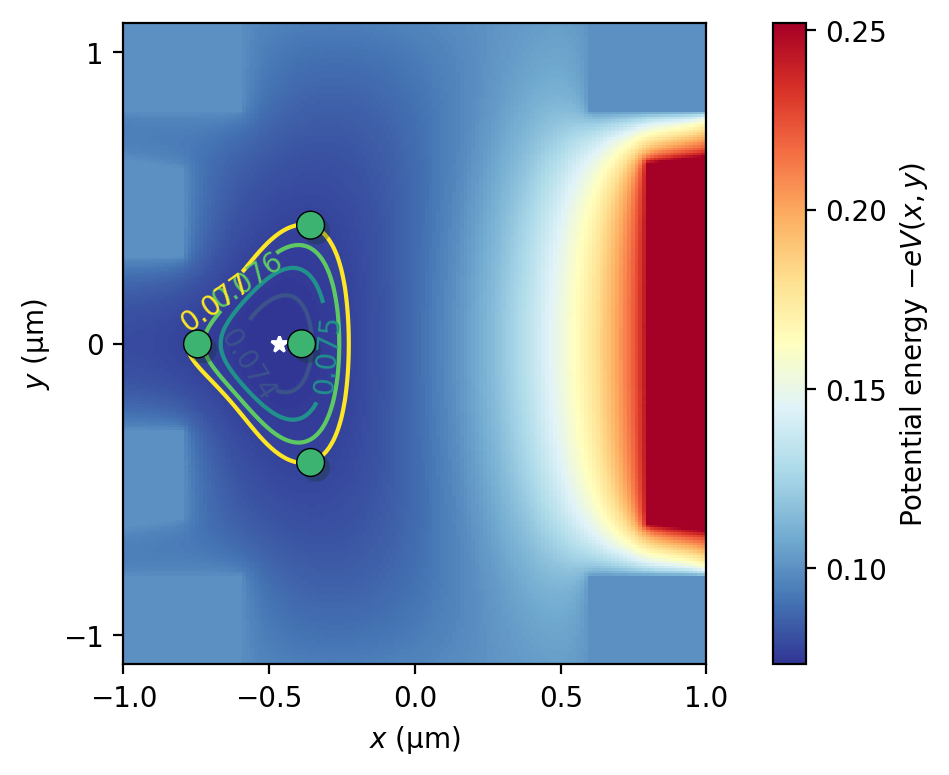

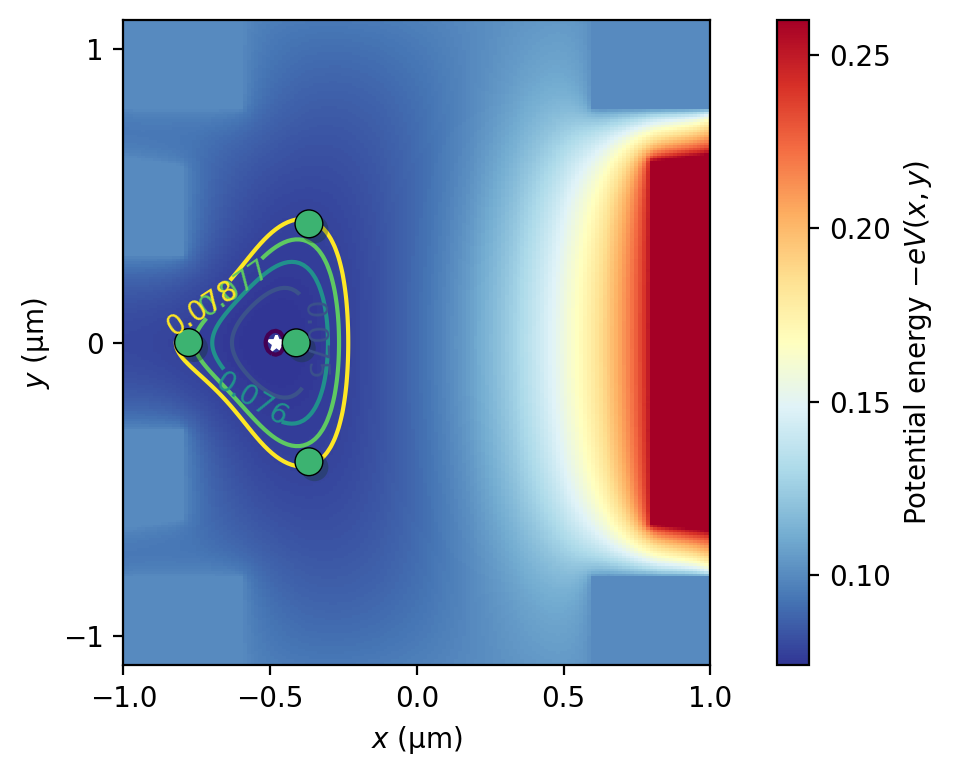

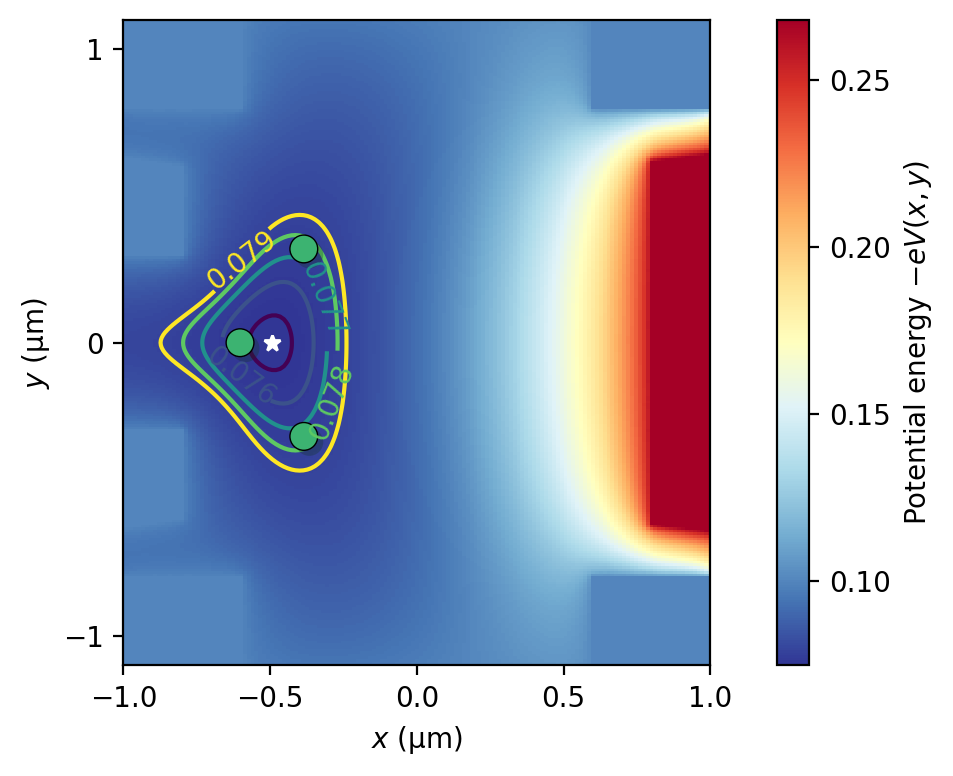

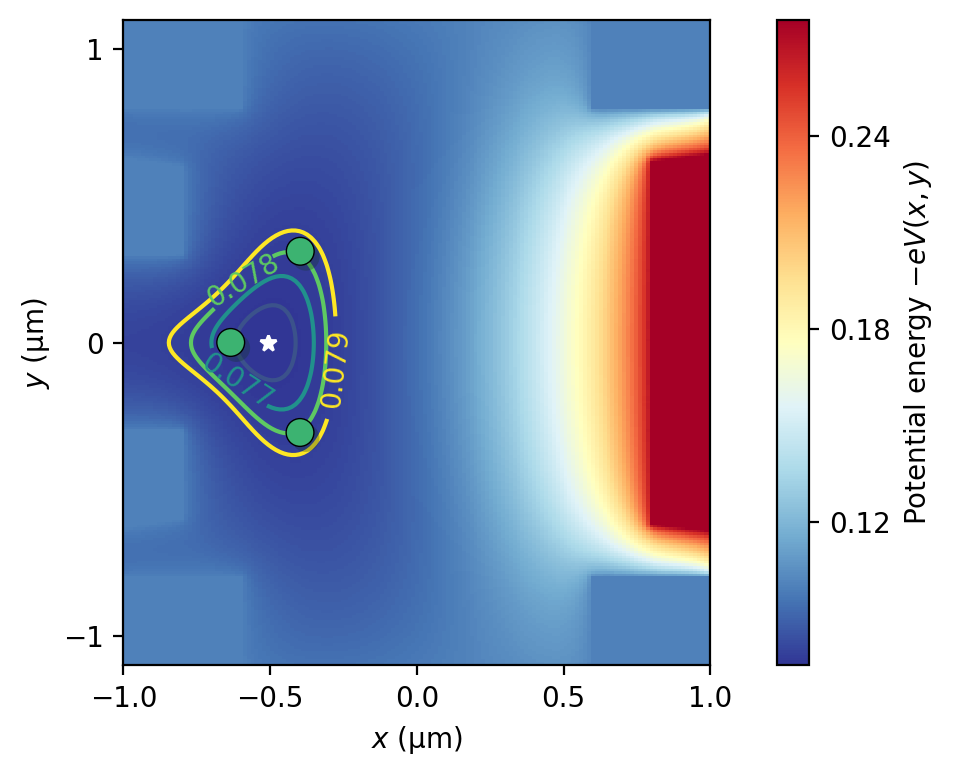

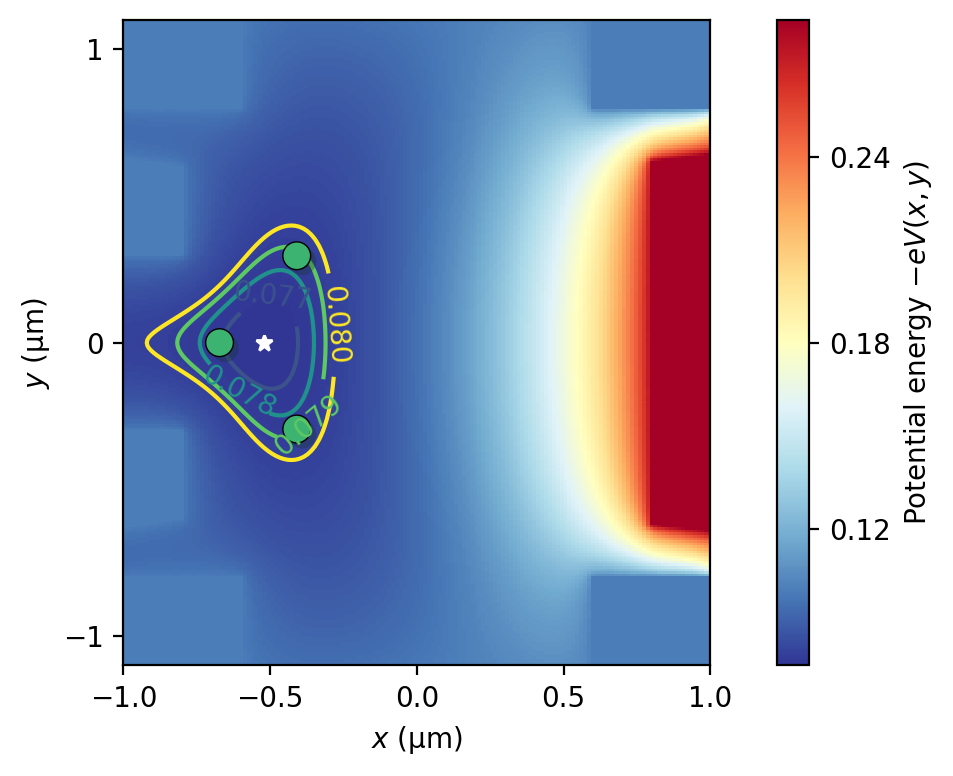

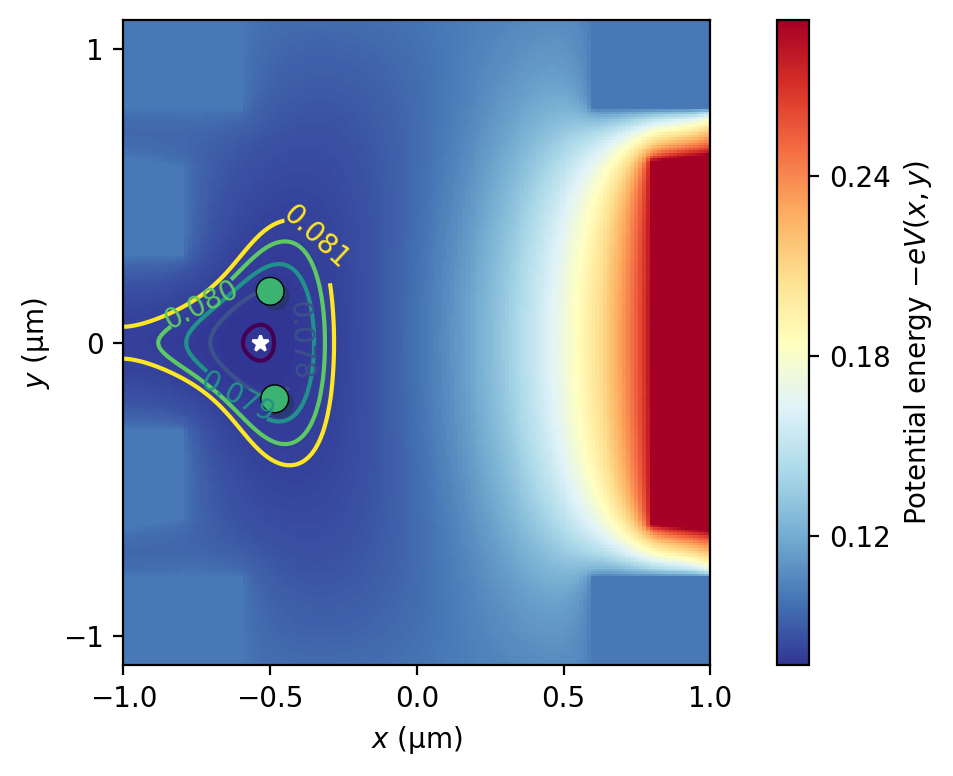

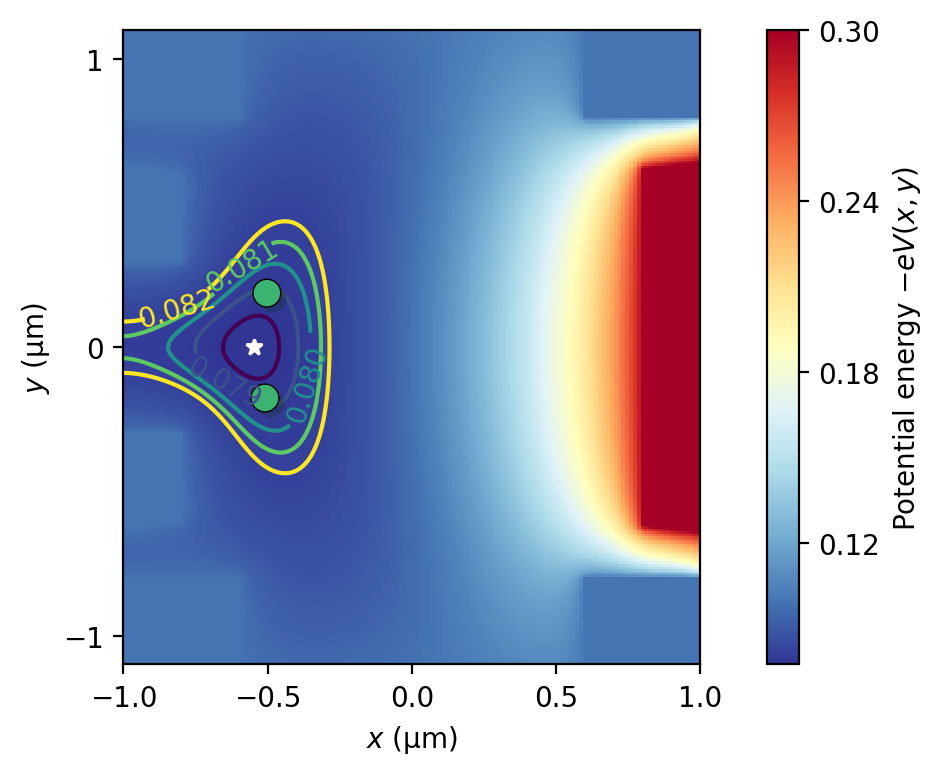

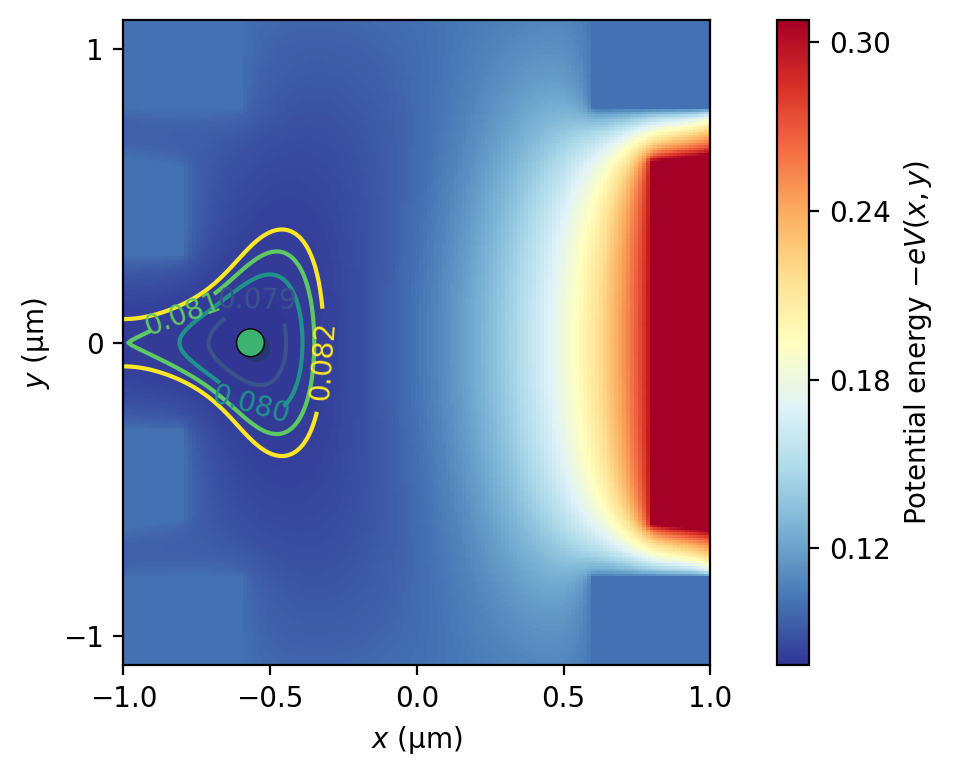

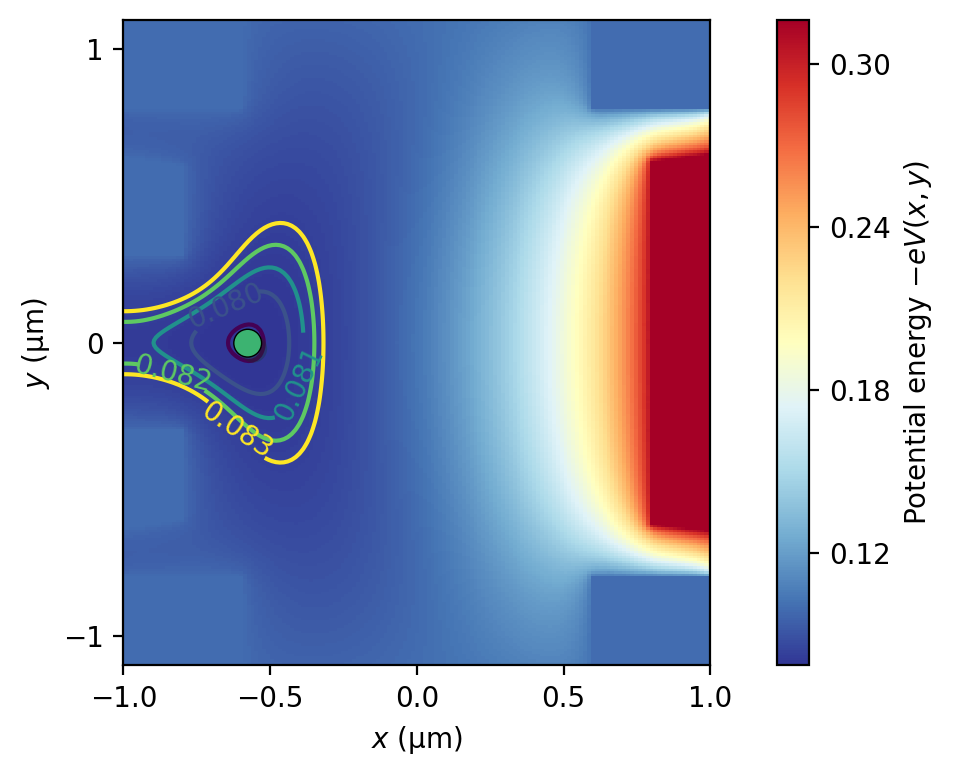

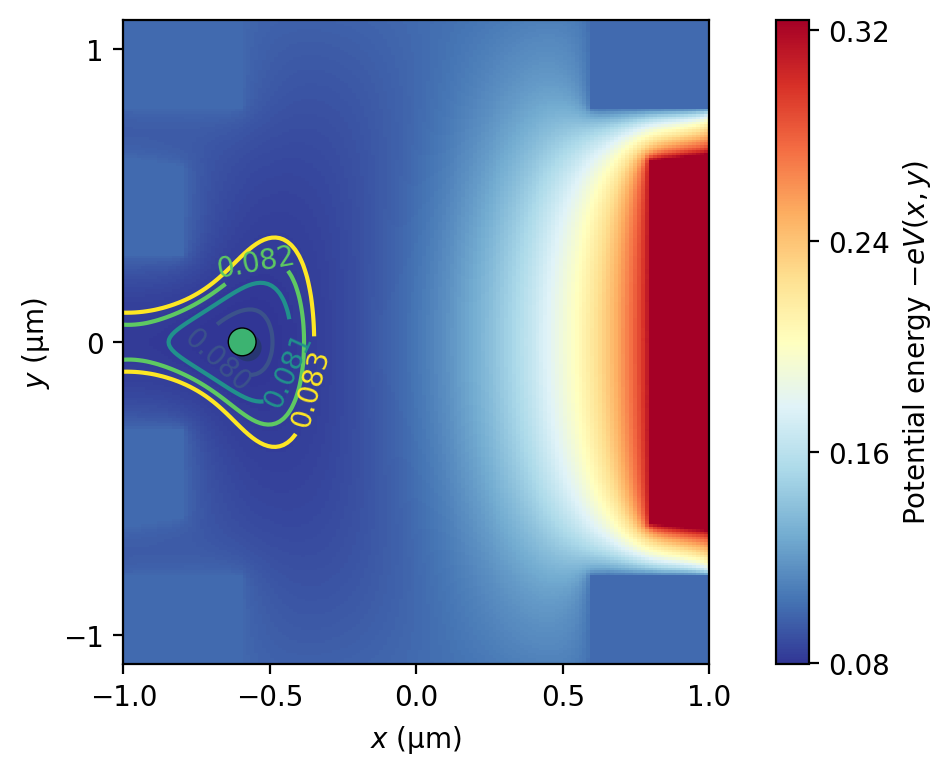

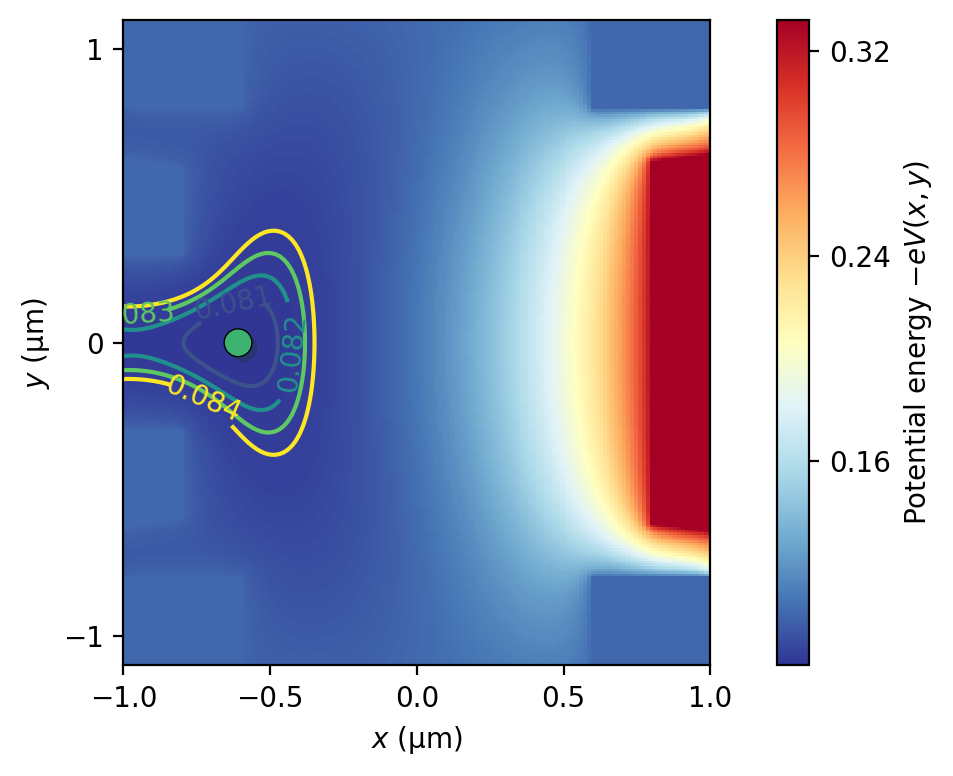

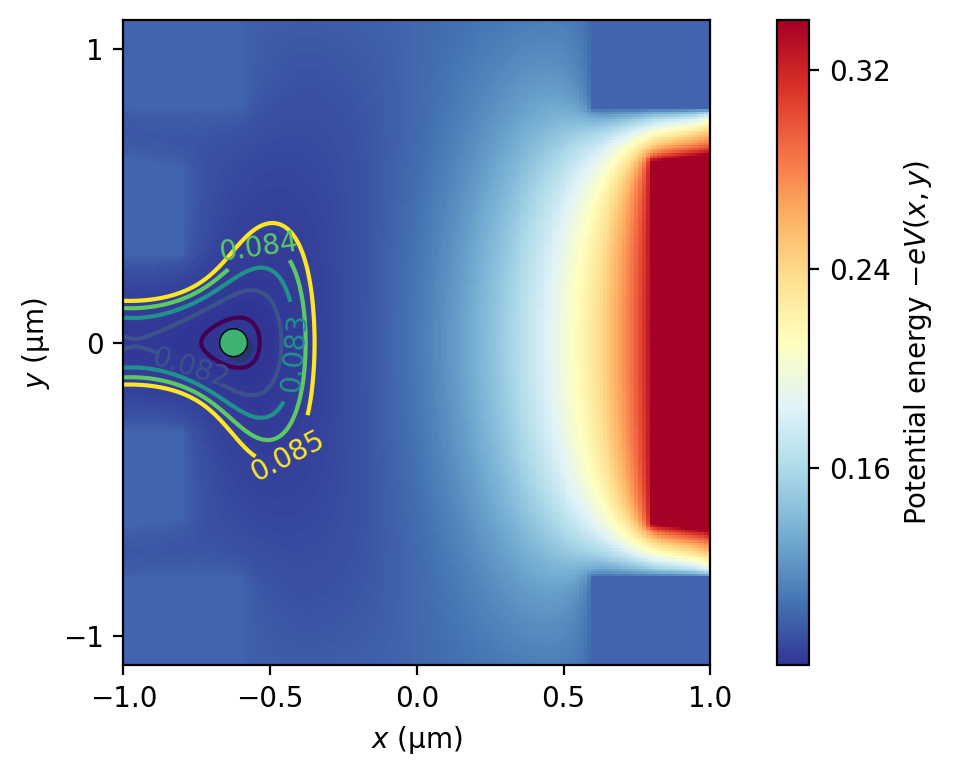

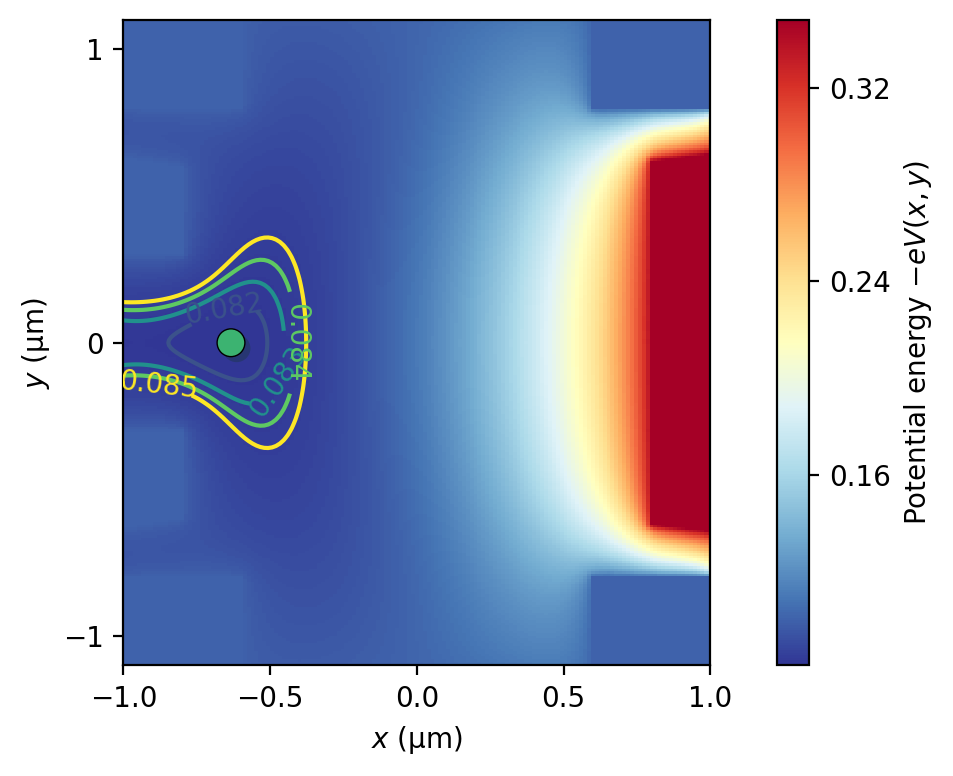

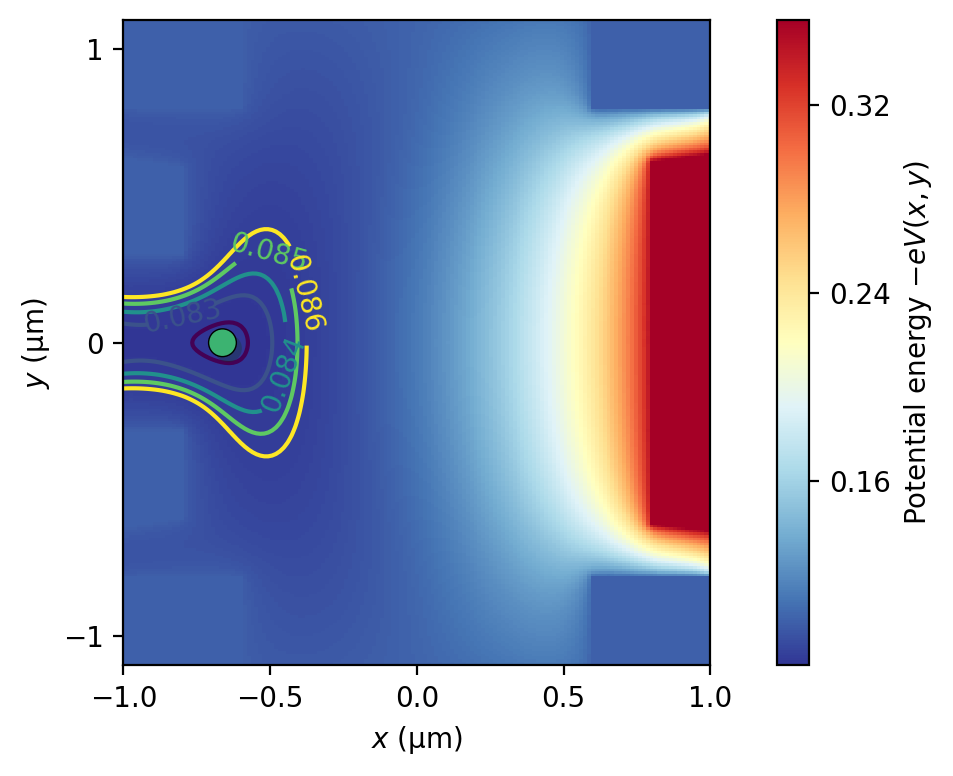

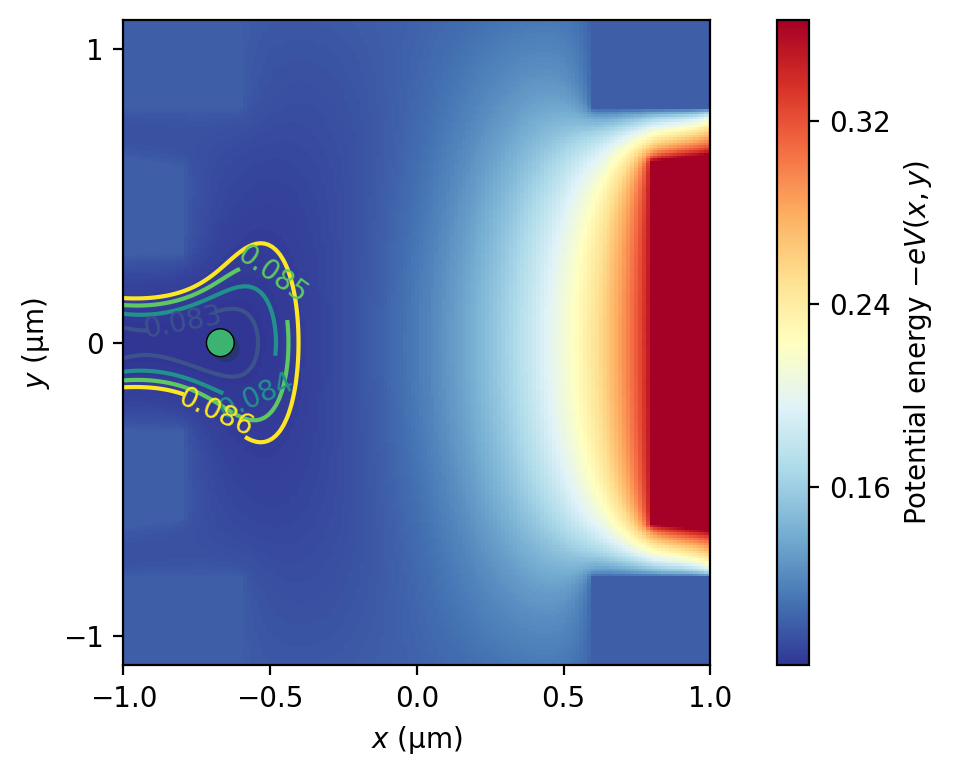

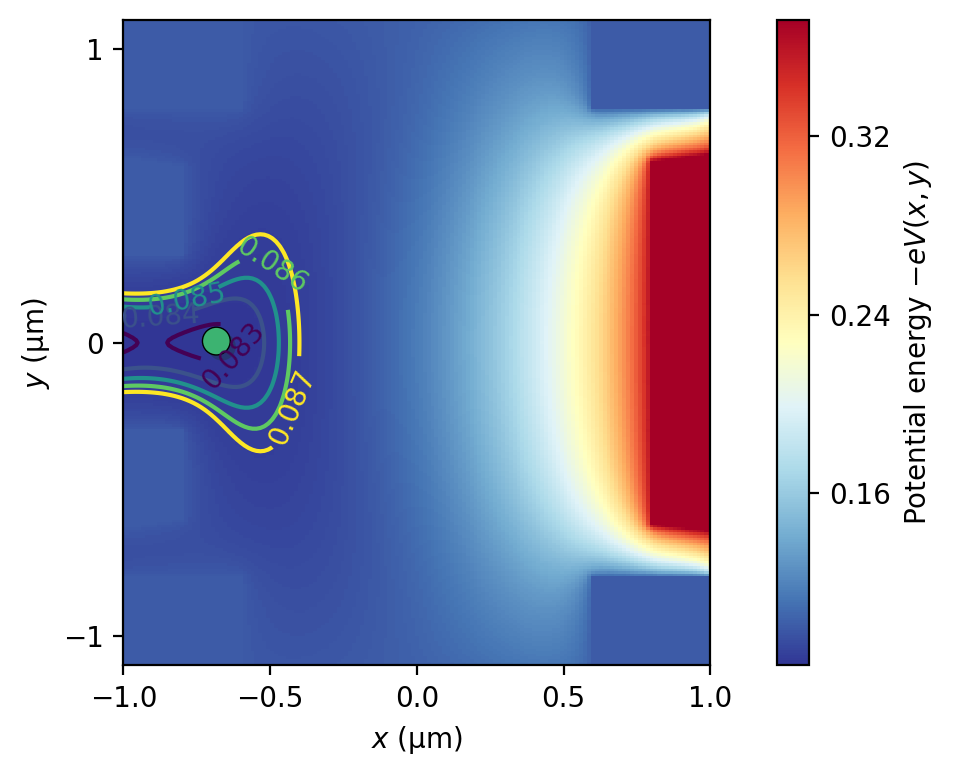

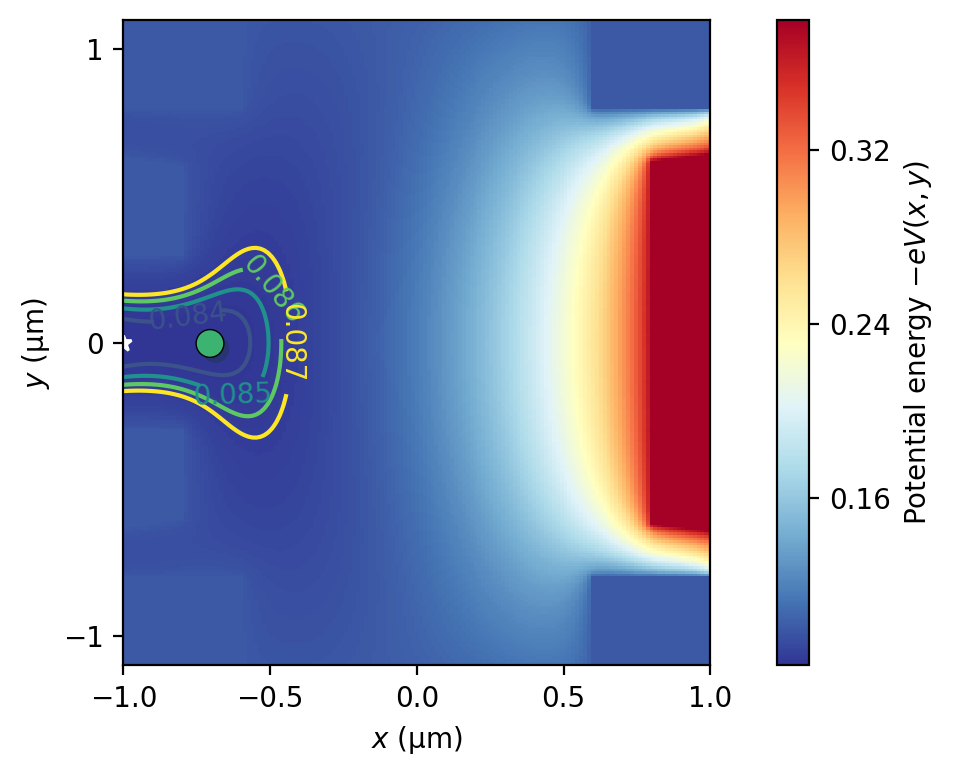

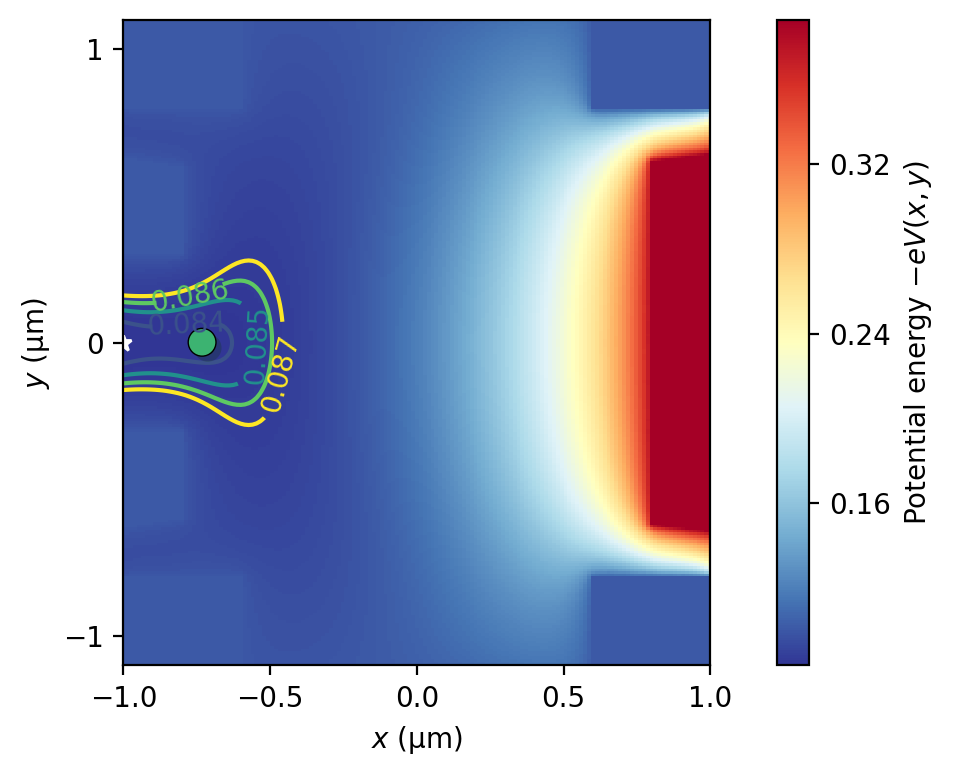

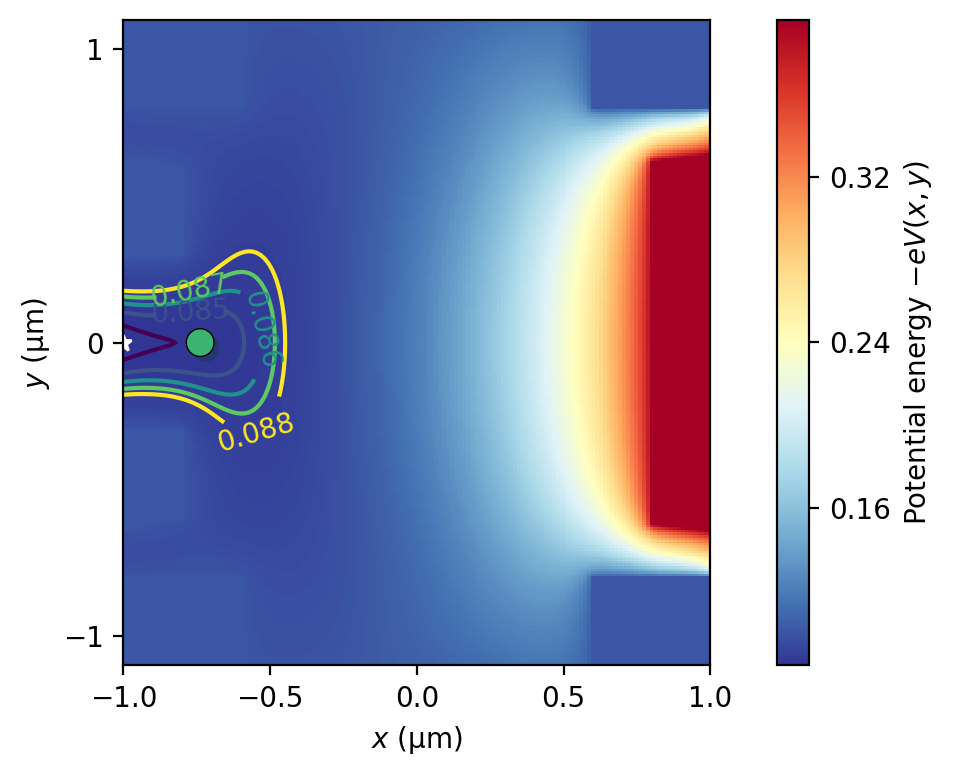

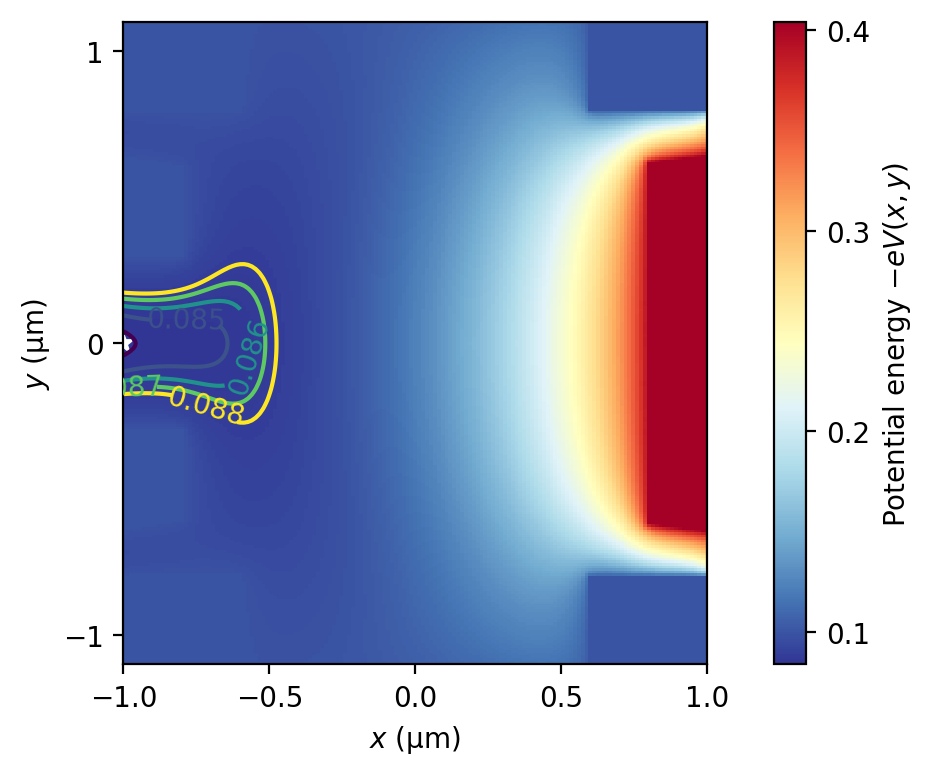

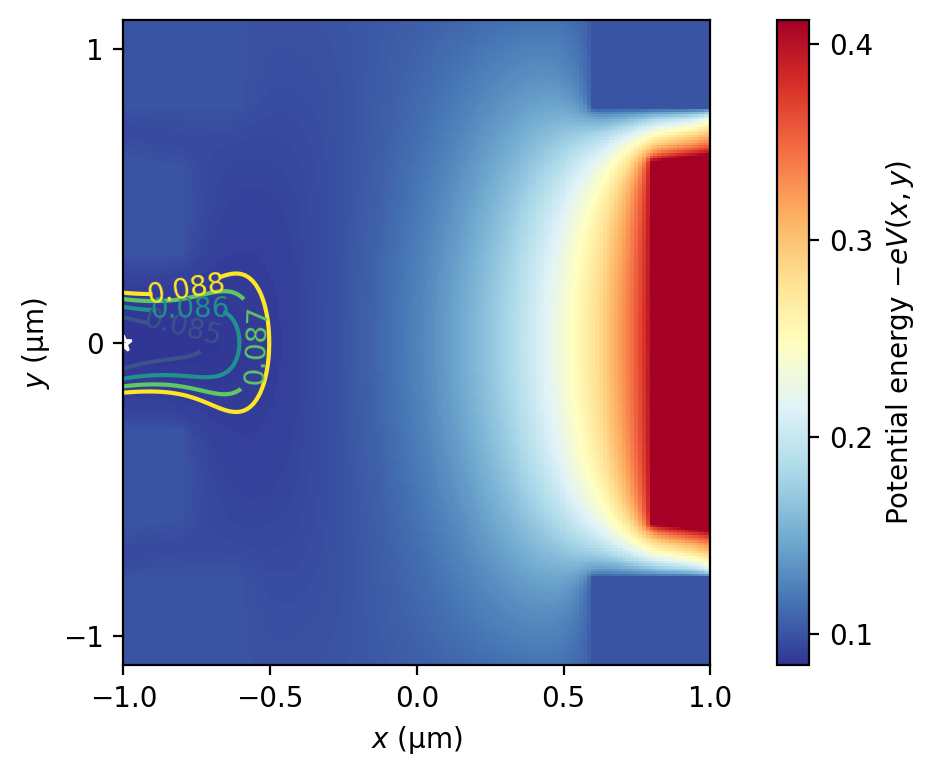

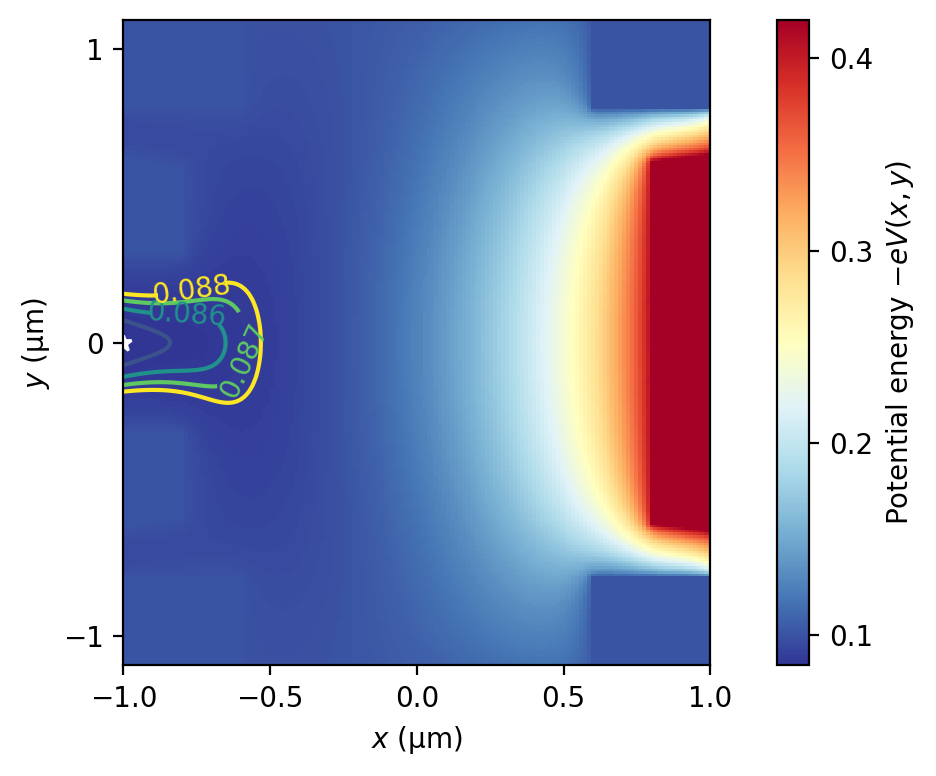

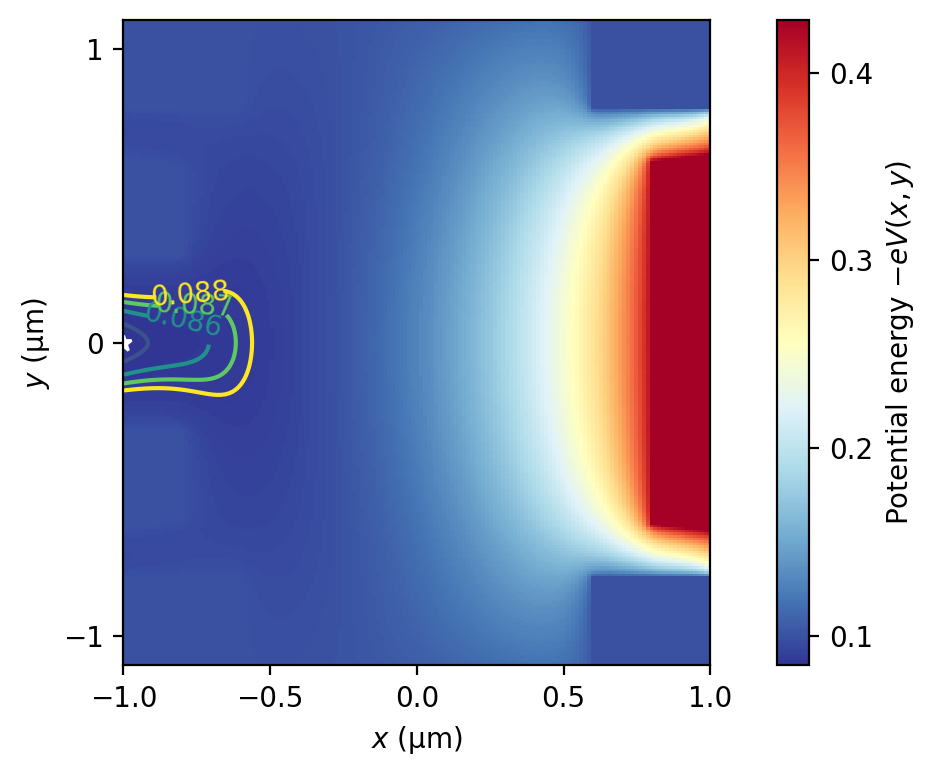

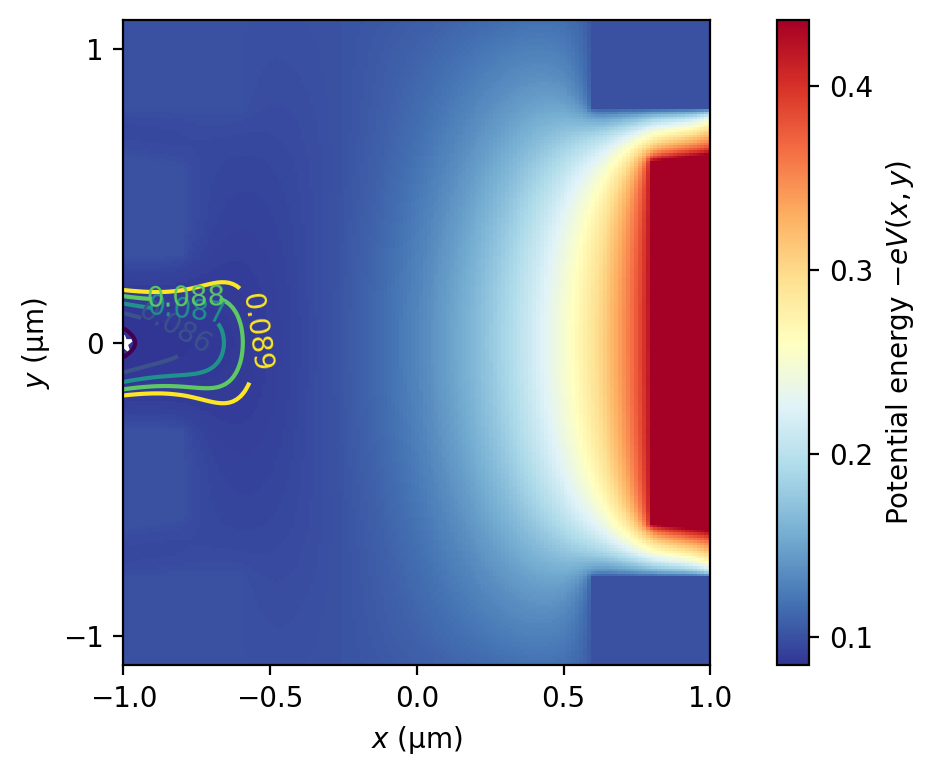

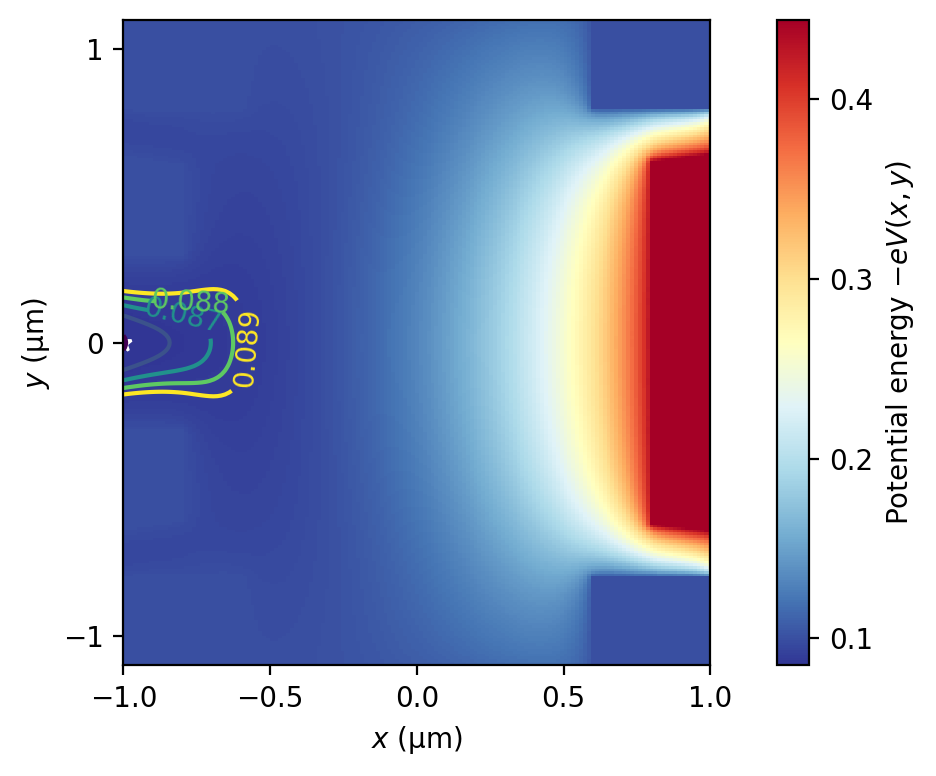

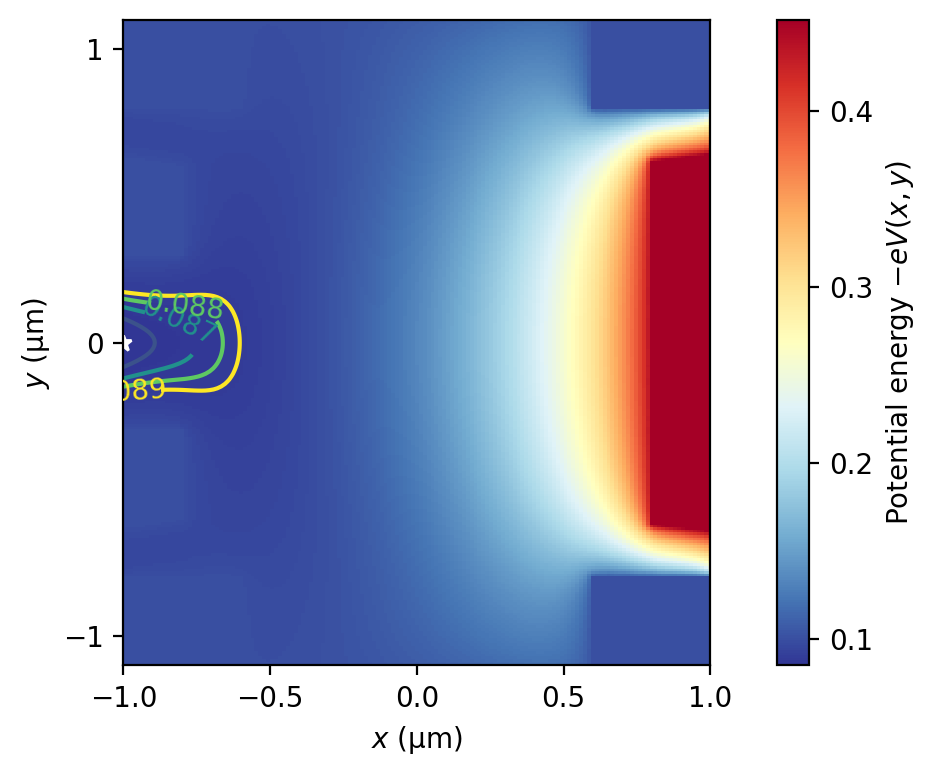

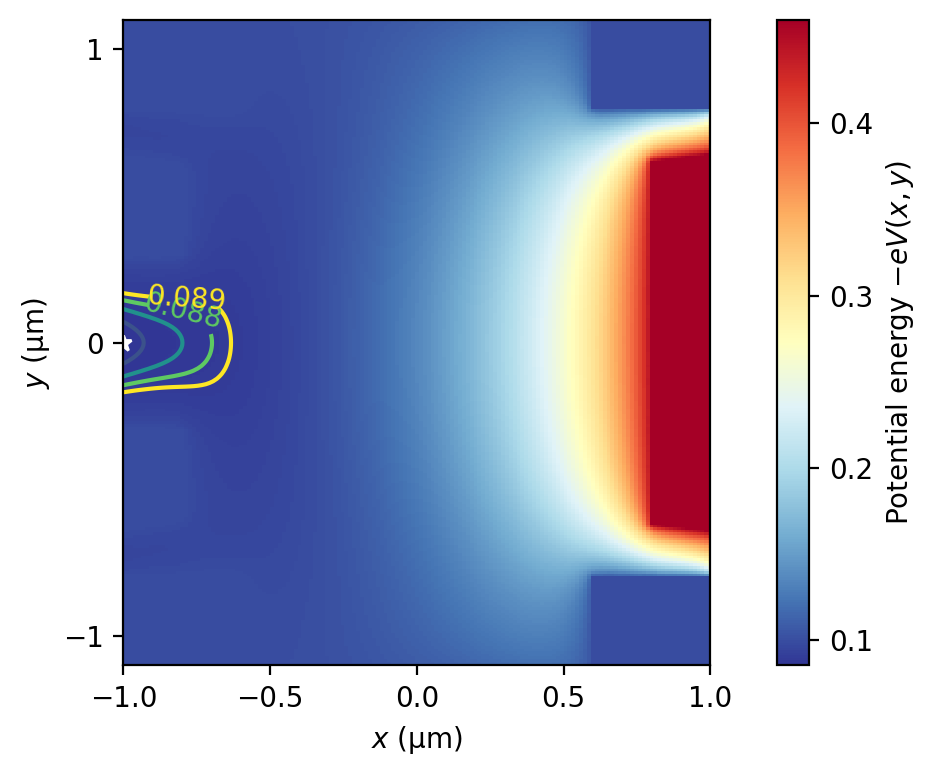

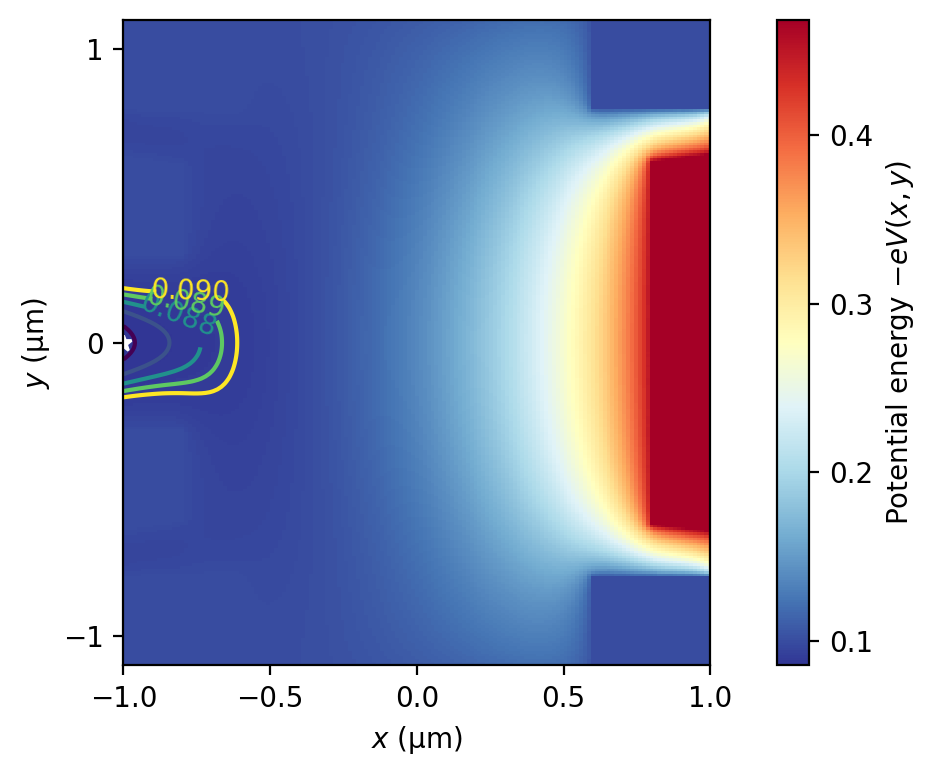

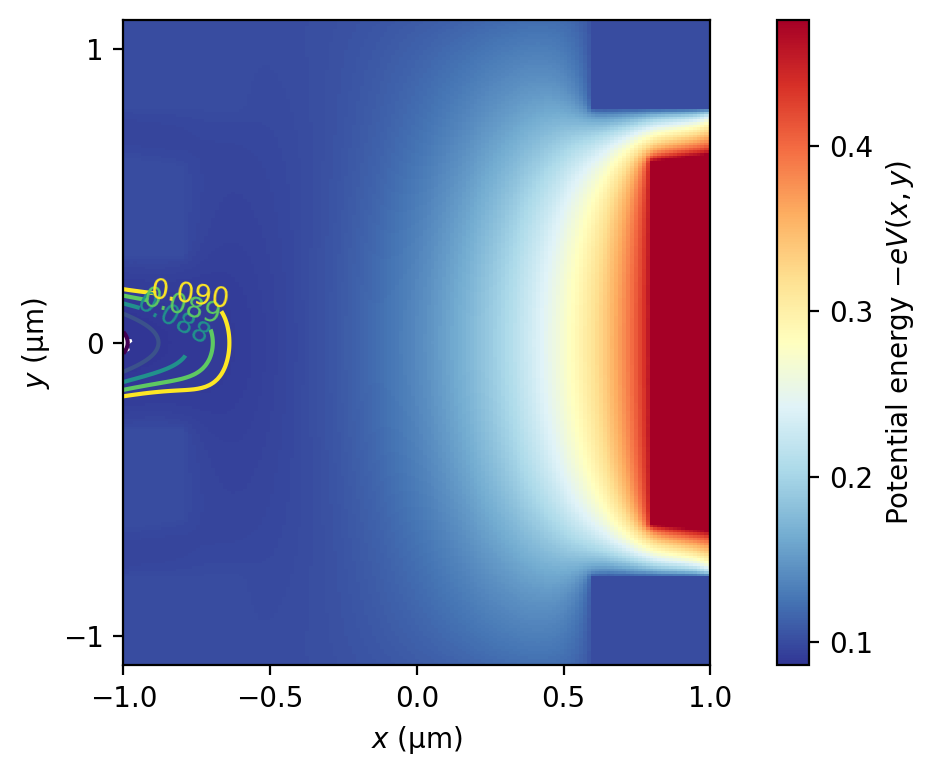

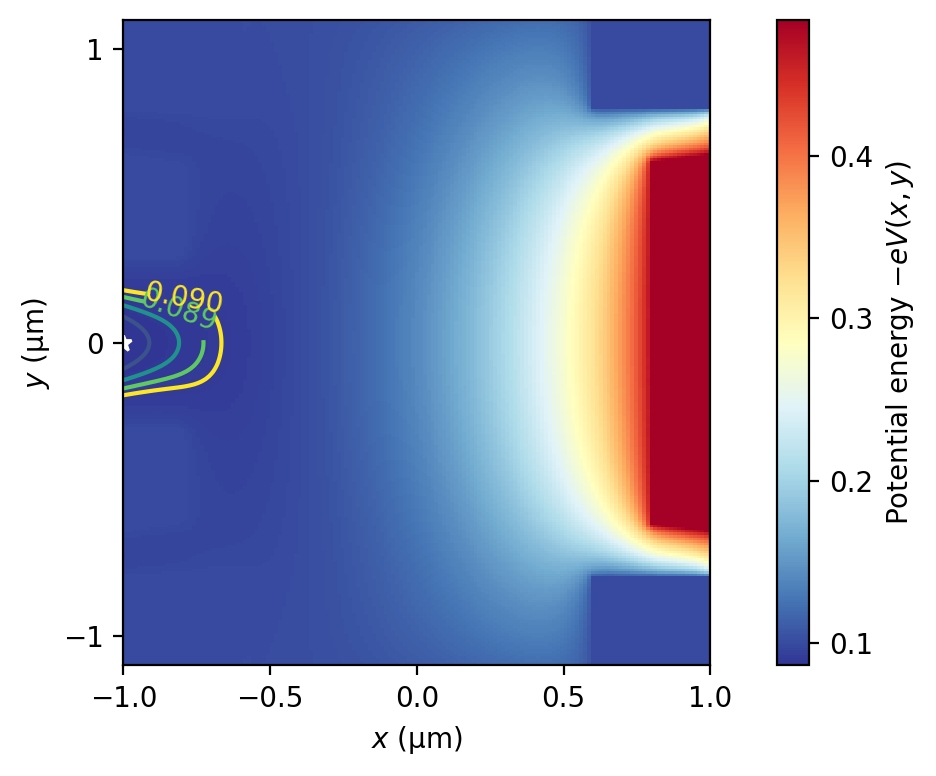

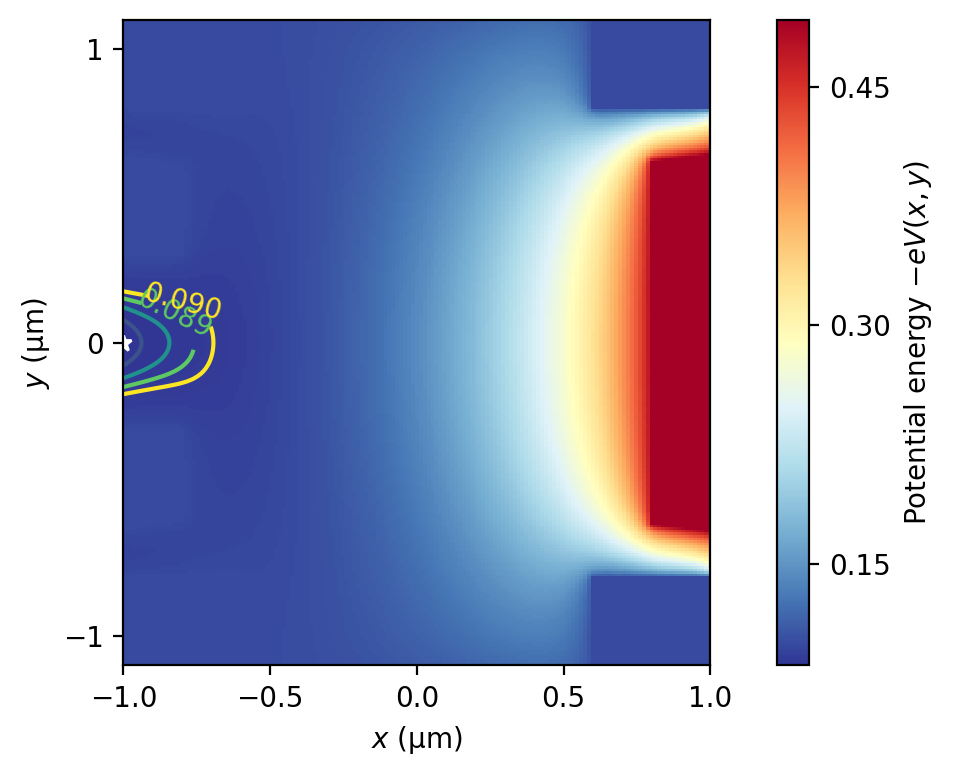

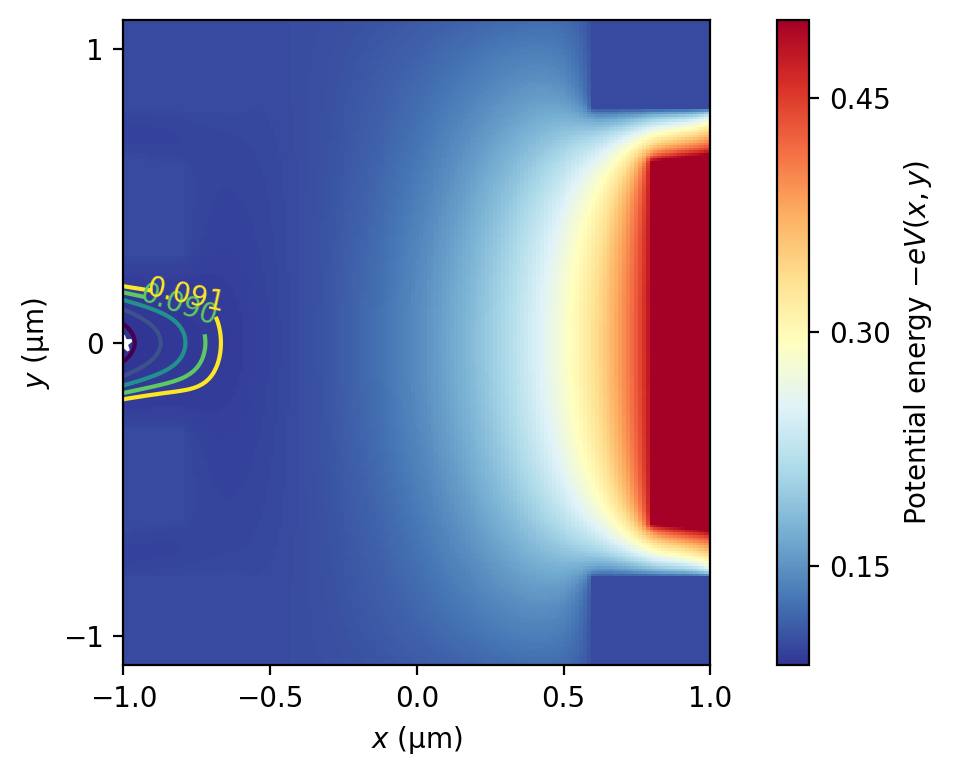

In [27]:
voltages = {'trench':   0.05,
            'gnd':      0, 
            'barrier':  -0.10,
            'resU':     -0.10,
            'resD':     -0.10,
            'unload':   -0.10}

unload_voltages = np.linspace(-0.1, -0.5, 51)

N_init = 4
energies = np.zeros(len(unload_voltages))
num_electrons = np.zeros(len(unload_voltages))

for k, unload in enumerate(unload_voltages):
    voltages['unload'] = unload
    
    f = FullModel(trap.dot, voltages)

    f.set_rf_interpolator(rf_electrode_labels=['resU', 'resD'])

    f.remove_unbound_electrons = False
    
    if k == 0: 
        electron_initial_positions = None
    else: 
        electron_initial_positions = res['x']
        
    res = f.get_trap_electron_positions(n_electrons=N_init, electron_initial_positions=electron_initial_positions, verbose=False)
    
    final_x, final_y = r2xy(res['x'])

    num_electrons[k] = f.count_electrons_in_dot(res['x'])
    
    qa = QuantumAnalysis(trap.dot, voltages)
    qa.plot_potential_energy(coor=[0, 0], dxdy=(2, 2.2))
    plt.plot(final_x*1e6, final_y*1e6, 'ok', mfc='mediumseagreen', mew=0.5, ms=10, path_effects=[pe.SimplePatchShadow(), pe.Normal()])
    # plt.plot(init_trap_x*1e6, init_trap_y*1e6, 'or', ms=3)

    energies[k] = res['fun']

In [23]:
np.amax(res['jac'])

0.09103377153223846

Text(0, 0.5, 'Cost function')

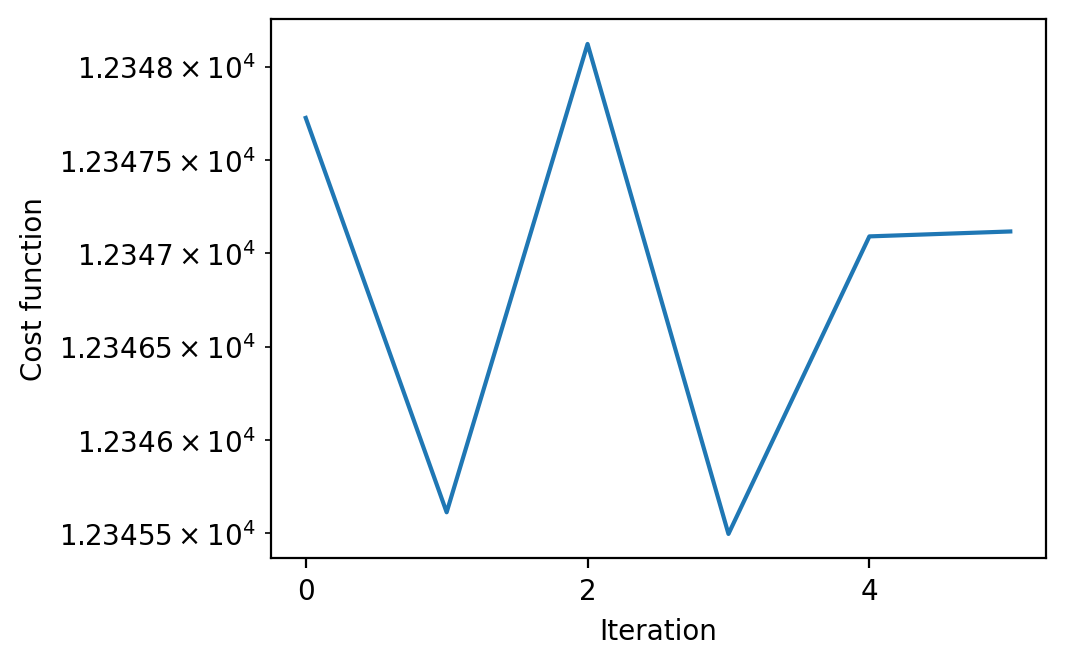

In [28]:
fig = plt.figure(figsize=(5.,3.5))
plt.plot(f.CM.curr_grad_norm)
# plt.plot(cf_w_grad)
plt.yscale('log')
plt.locator_params(axis='x', nbins=4)
plt.xlabel("Iteration")
plt.ylabel("Cost function")
# plt.xlim(-0.5, iter_w_grad) #CM.call_counter)

Text(0, 0.5, 'Number of electrons')

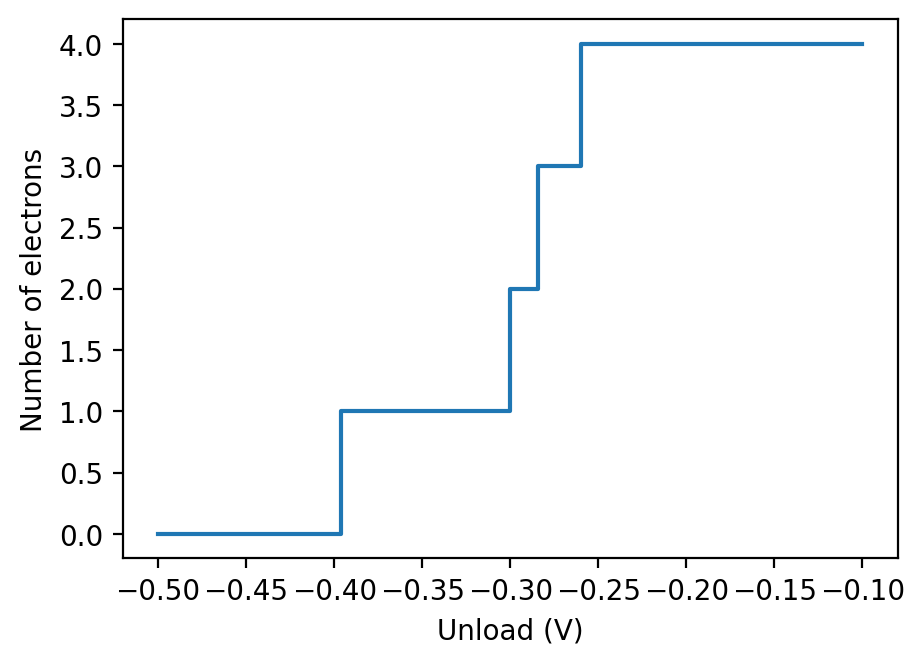

In [33]:
fig = plt.figure(figsize=(5.,3.5))
plt.step(unload_voltages, num_electrons)
plt.xlabel("Unload (V)")
plt.ylabel("Number of electrons")